In [1]:
# First of all for a good start, importing all the basic packages, that we use frequently:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import sys

import warnings
warnings.filterwarnings('ignore')
# import lux

In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
dataset.shape # For checking the dataset rows & columns

(178, 14)

In [4]:
# Setting up the values which has more data - For visibility
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',30)
pd.set_option('display.width',500)

In [5]:
# Handling missing values - Not needed, as we dont have missing values
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
# Checking for wrong data available in columns or not
for i in dataset.columns:
    print("**********",i,"**********")
    print()
    print(set(dataset[i].to_list()))
    print()
    print()

********** Alcohol **********

{11.62, 12.29, 13.34, 13.28, 13.03, 11.96, 12.93, 13.75, 13.63, 13.83, 14.12, 14.75, 14.38, 12.86, 12.36, 13.23, 13.36, 11.64, 11.82, 11.61, 11.46, 11.79, 12.0, 12.64, 12.21, 12.25, 12.07, 13.29, 13.11, 13.68, 13.86, 13.64, 13.71, 13.5, 14.39, 14.21, 13.07, 12.58, 12.42, 13.39, 13.08, 13.77, 13.52, 13.27, 12.43, 12.87, 11.65, 11.76, 11.87, 12.69, 12.37, 12.33, 12.08, 12.72, 13.87, 13.94, 13.76, 13.51, 13.58, 14.19, 14.37, 14.83, 14.22, 13.72, 12.82, 12.96, 12.84, 12.53, 13.9, 13.4, 13.62, 13.84, 13.78, 12.81, 11.66, 11.84, 11.41, 11.45, 12.7, 12.16, 12.34, 12.52, 12.77, 13.16, 13.41, 13.73, 13.48, 13.05, 14.3, 14.23, 13.3, 13.2, 14.2, 14.02, 14.34, 14.16, 13.69, 12.88, 12.47, 12.22, 12.04, 12.79, 11.81, 11.03, 11.56, 12.99, 12.85, 12.17, 12.67, 12.6, 13.24, 13.67, 13.74, 13.49, 13.56, 14.06, 14.1, 13.88, 12.51, 13.17, 12.45, 12.2, 14.13, 13.82, 13.32, 13.45}


********** Malic_Acid **********

{0.94, 1.95, 1.71, 2.36, 2.59, 1.78, 1.76, 1.87, 2.15, 1.64, 1

In [7]:
# Information about dataset, which contains datatype, null counts & column names etc
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
# Encoding dataset - Not required. as we dont have the object datatype
# So we can skip this step - as we have only numbers

# 1. Compute and plot those feature which are related to each other?

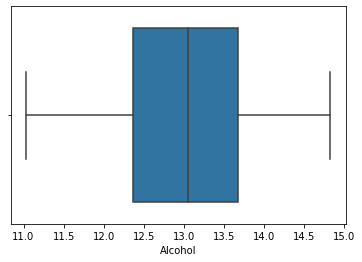

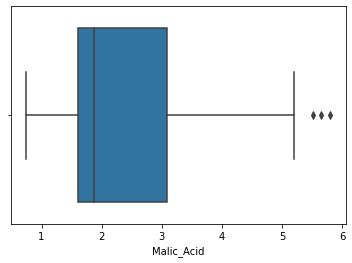

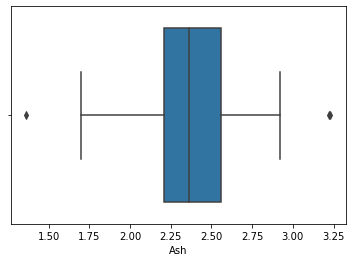

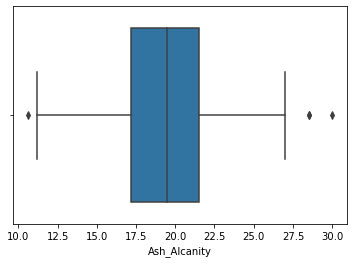

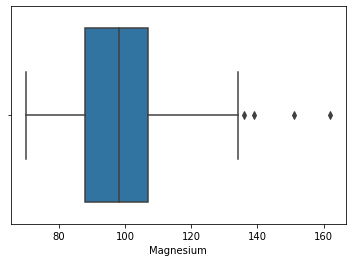

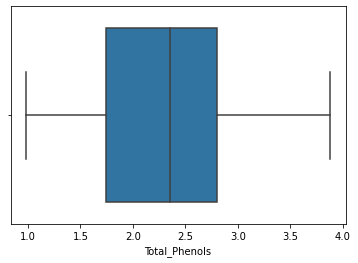

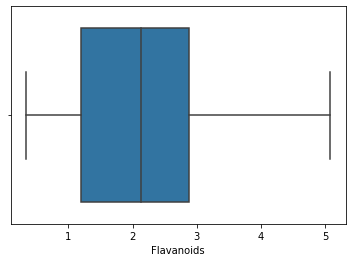

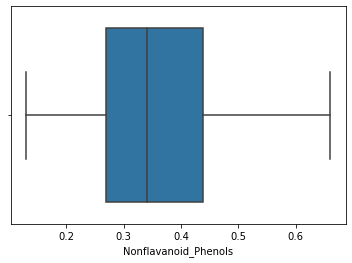

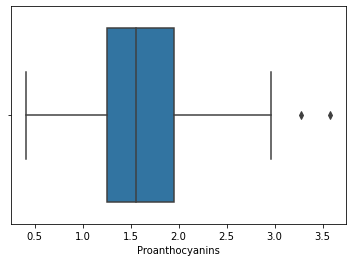

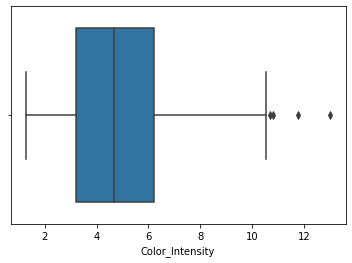

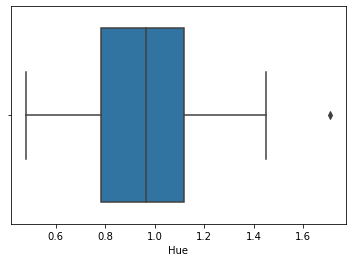

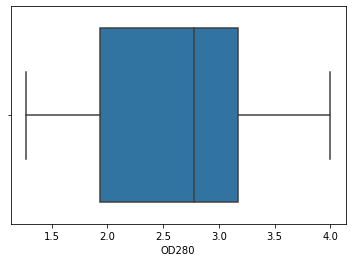

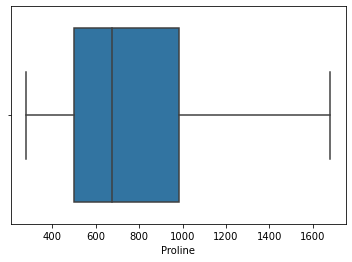

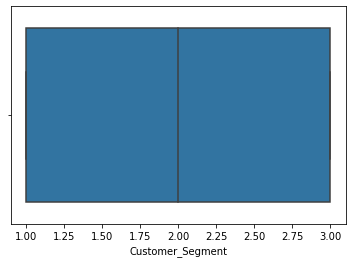

In [9]:
# Boxplot - To find the outliers/extreme values
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns):
    boxplots(i)

<AxesSubplot:xlabel='Customer_Segment', ylabel='Density'>

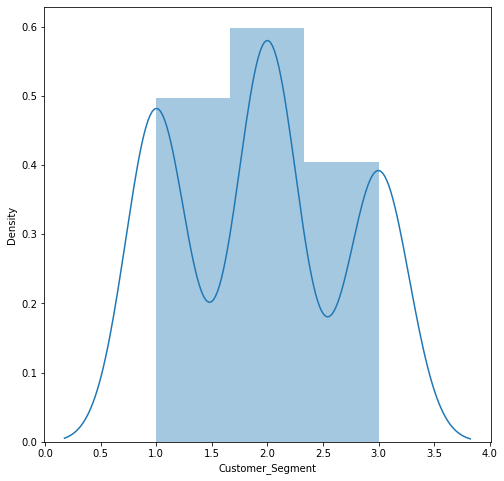

In [10]:
# Distribution plot - To check the distribution

plt.figure(figsize=(8,8))
sns.distplot(dataset['Customer_Segment'])

In [11]:
# Heat map - To check the variance in dataset & mainly for multicollinearity
dataset.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<AxesSubplot:>

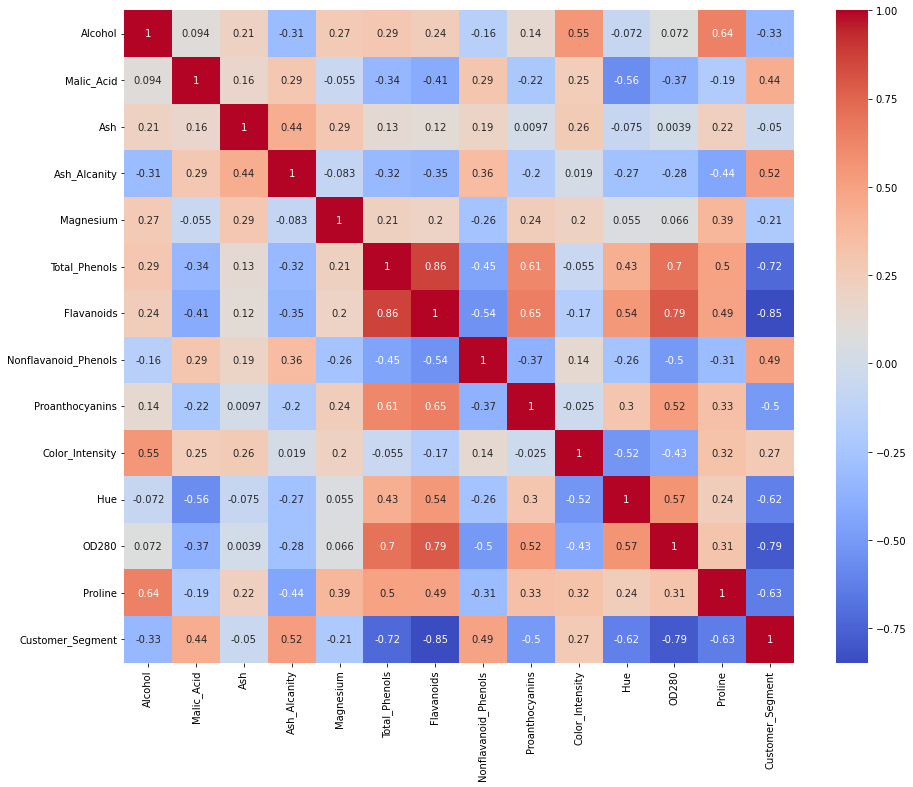

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

<Figure size 2160x2160 with 0 Axes>

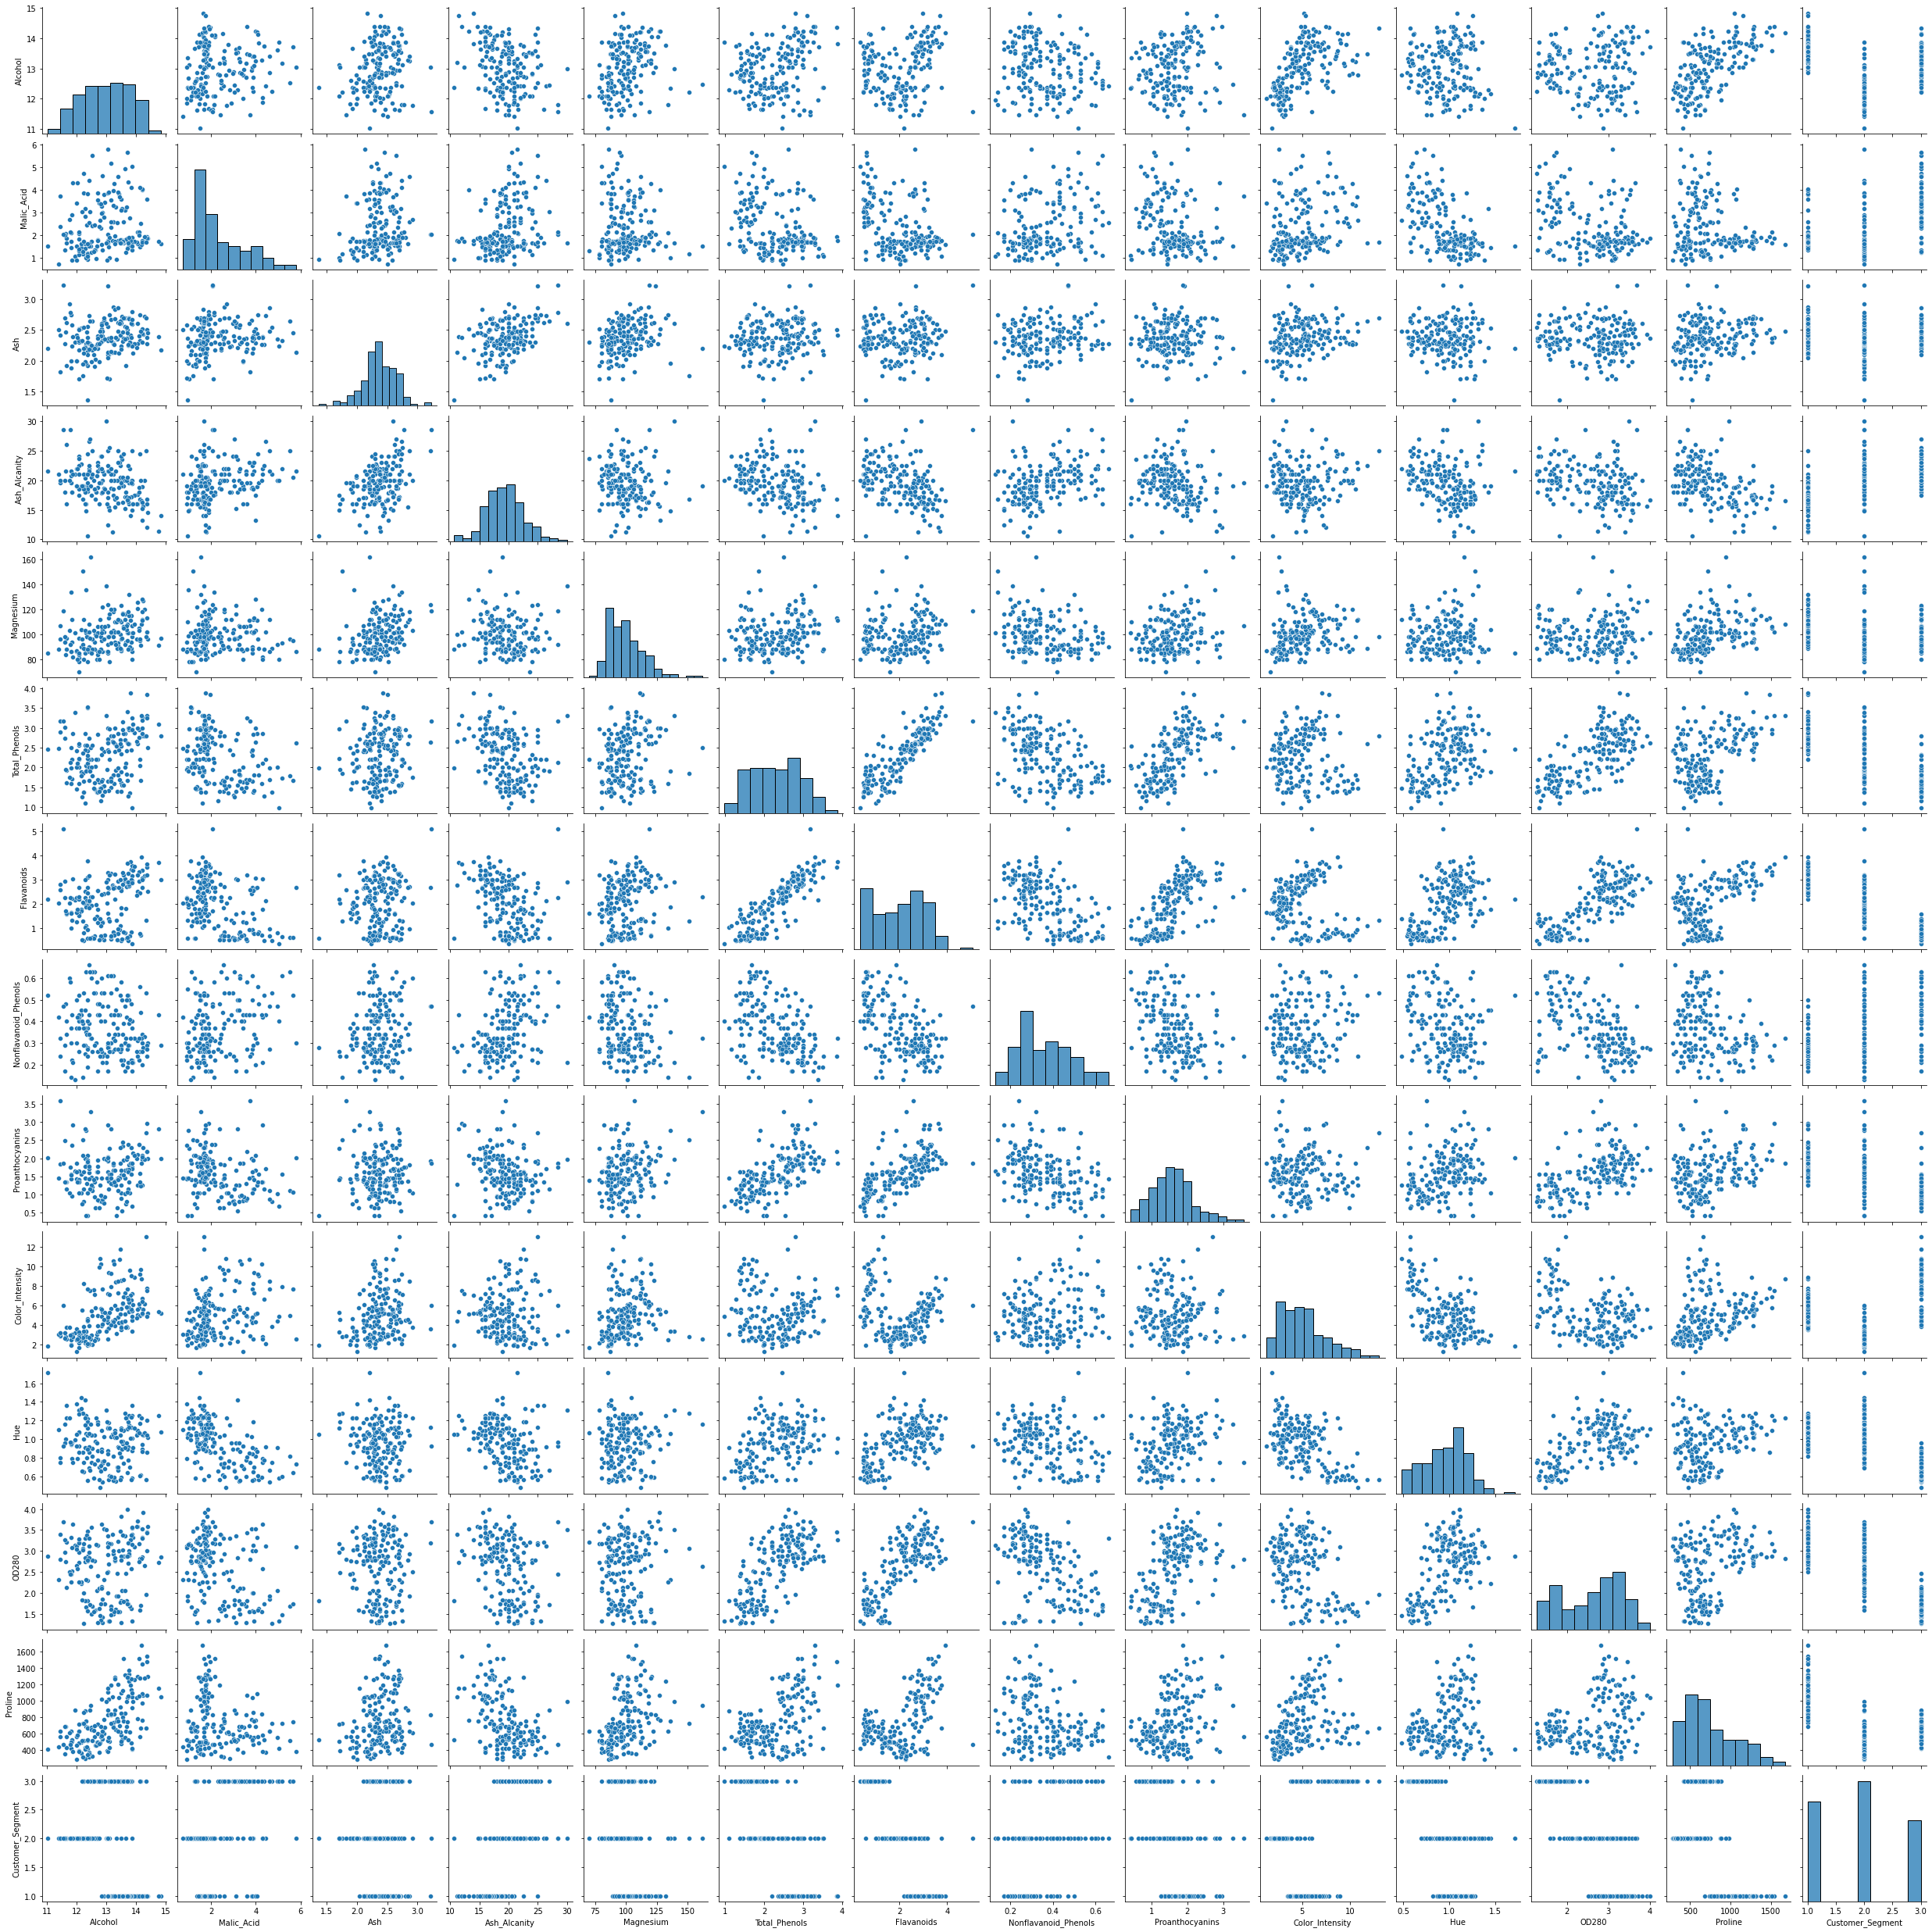

In [13]:
# Pairplot - Summarization of large amount of datasets / Relationship between variables within the datsest
plt.figure(figsize=(30,30))
sns.pairplot(dataset)

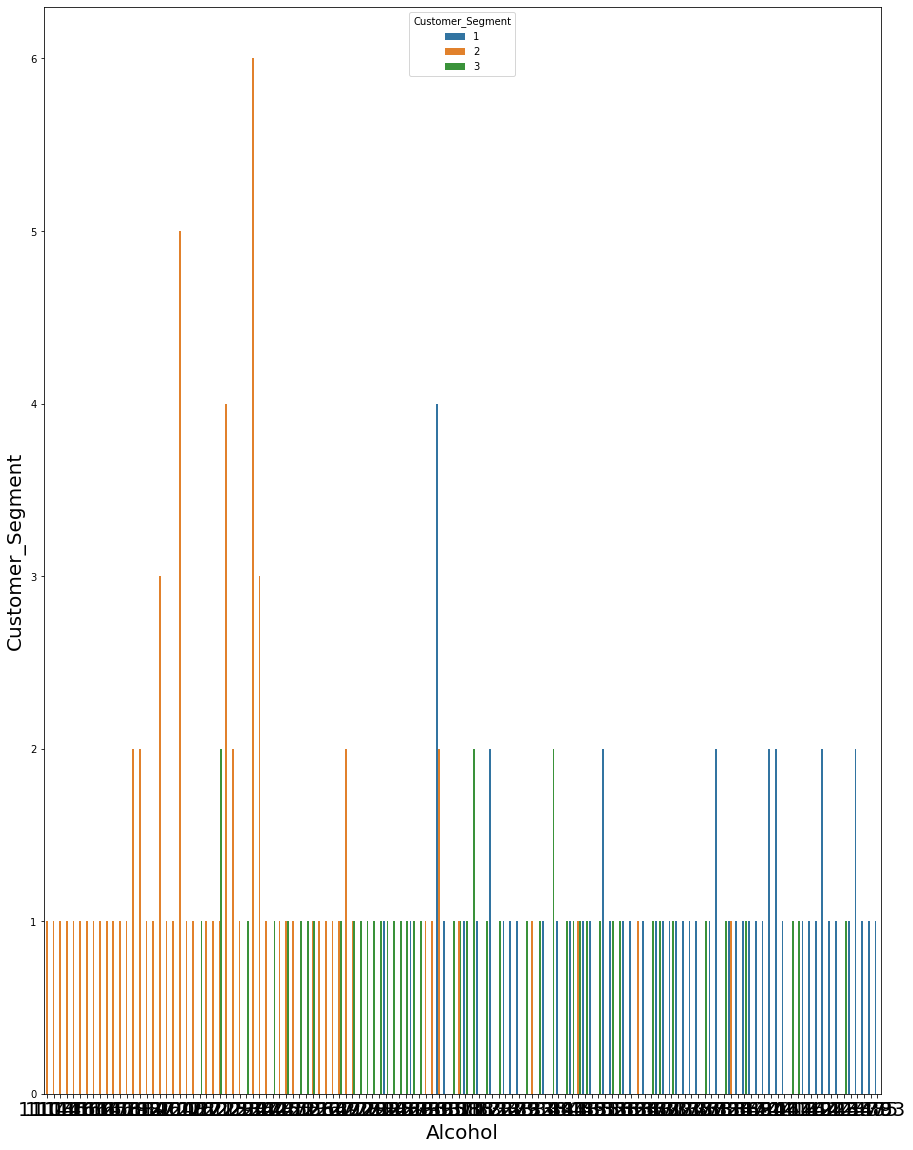

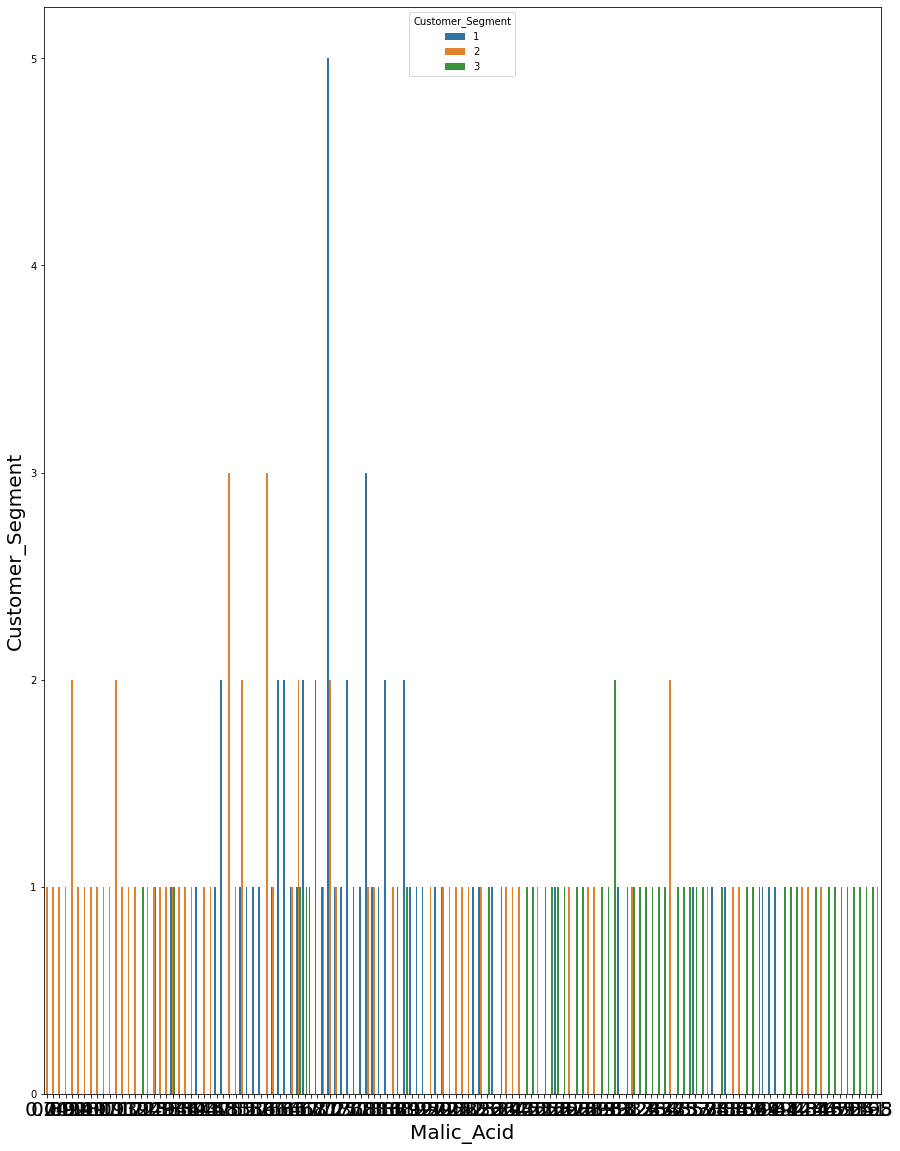

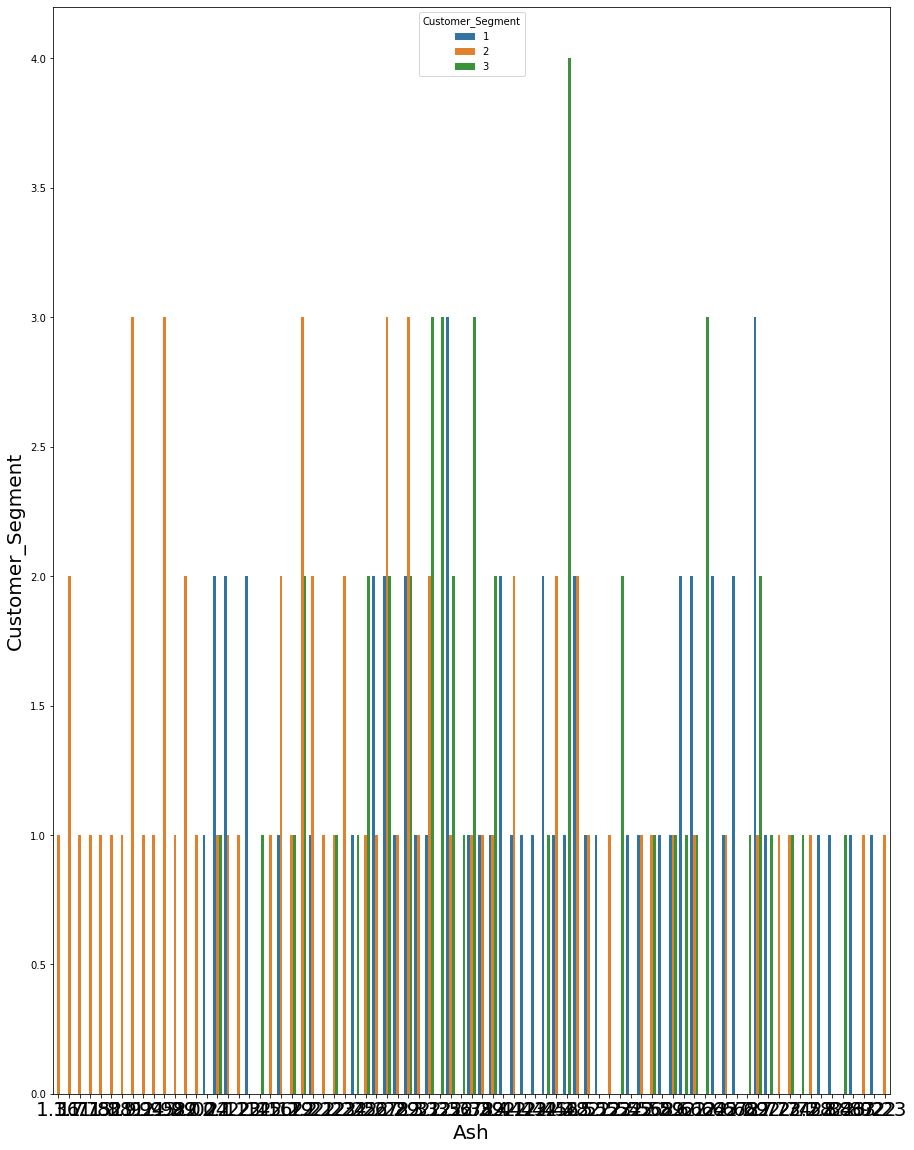

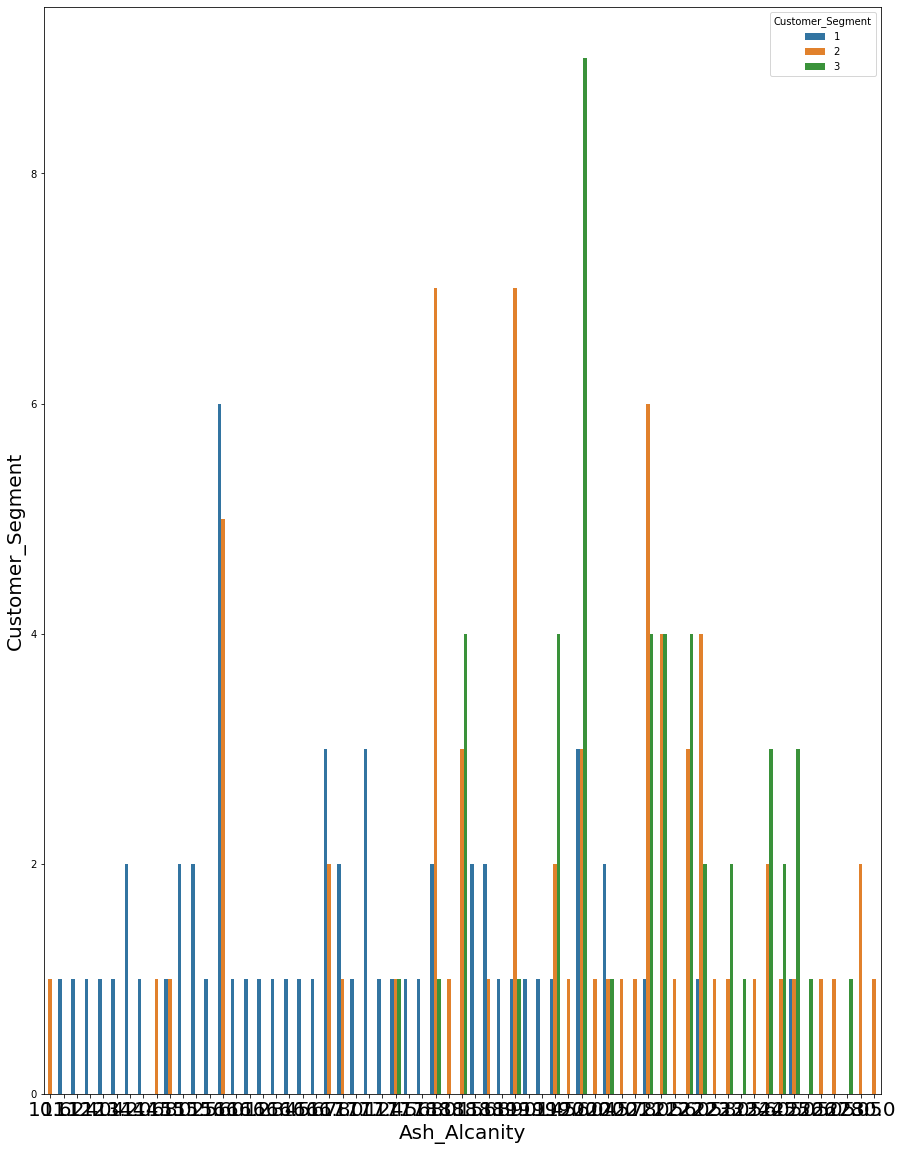

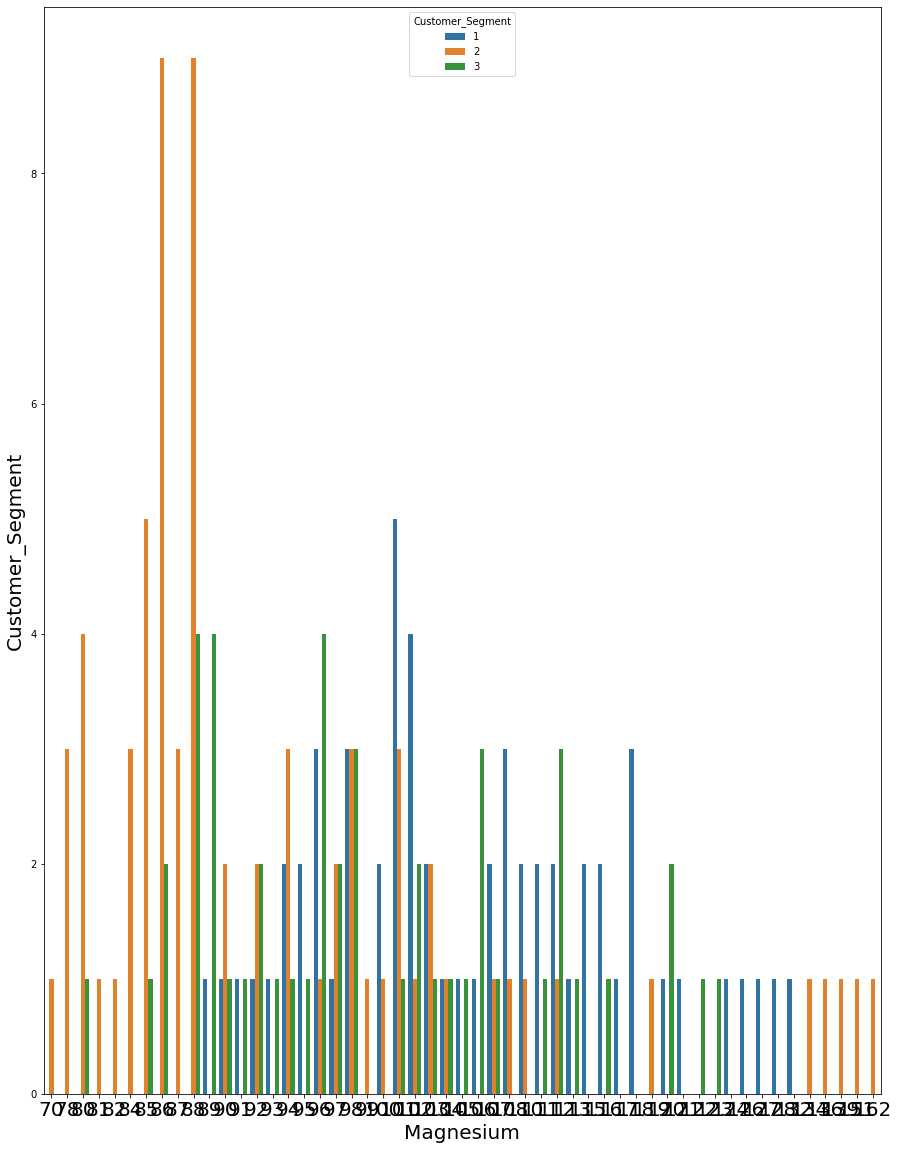

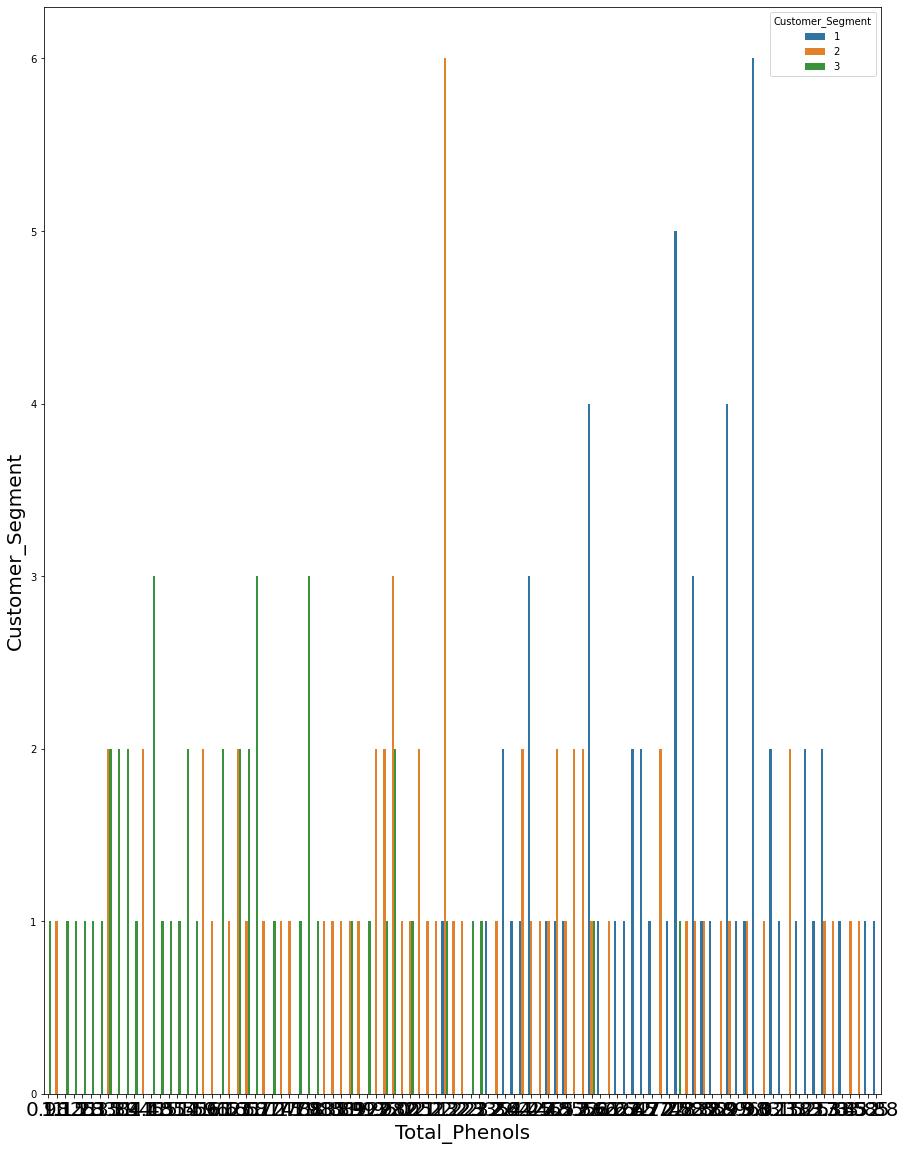

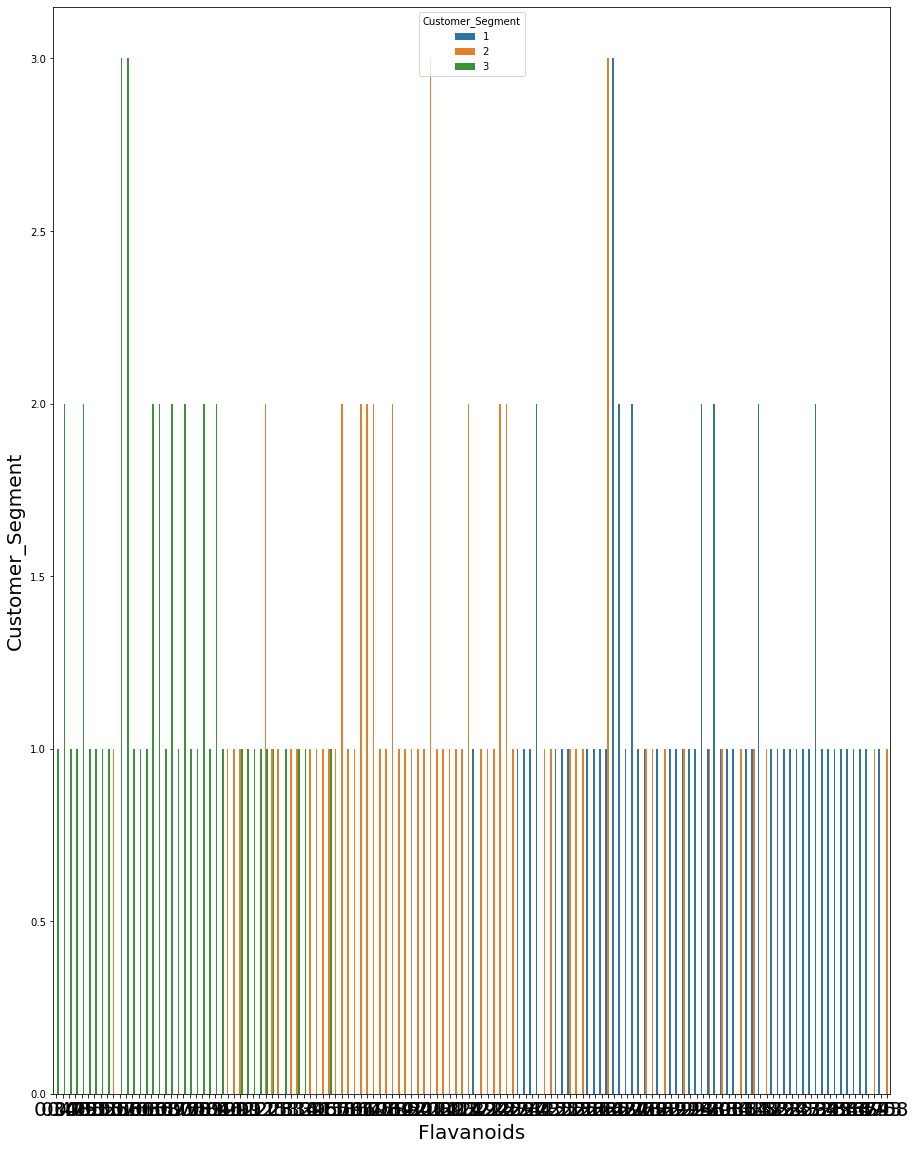

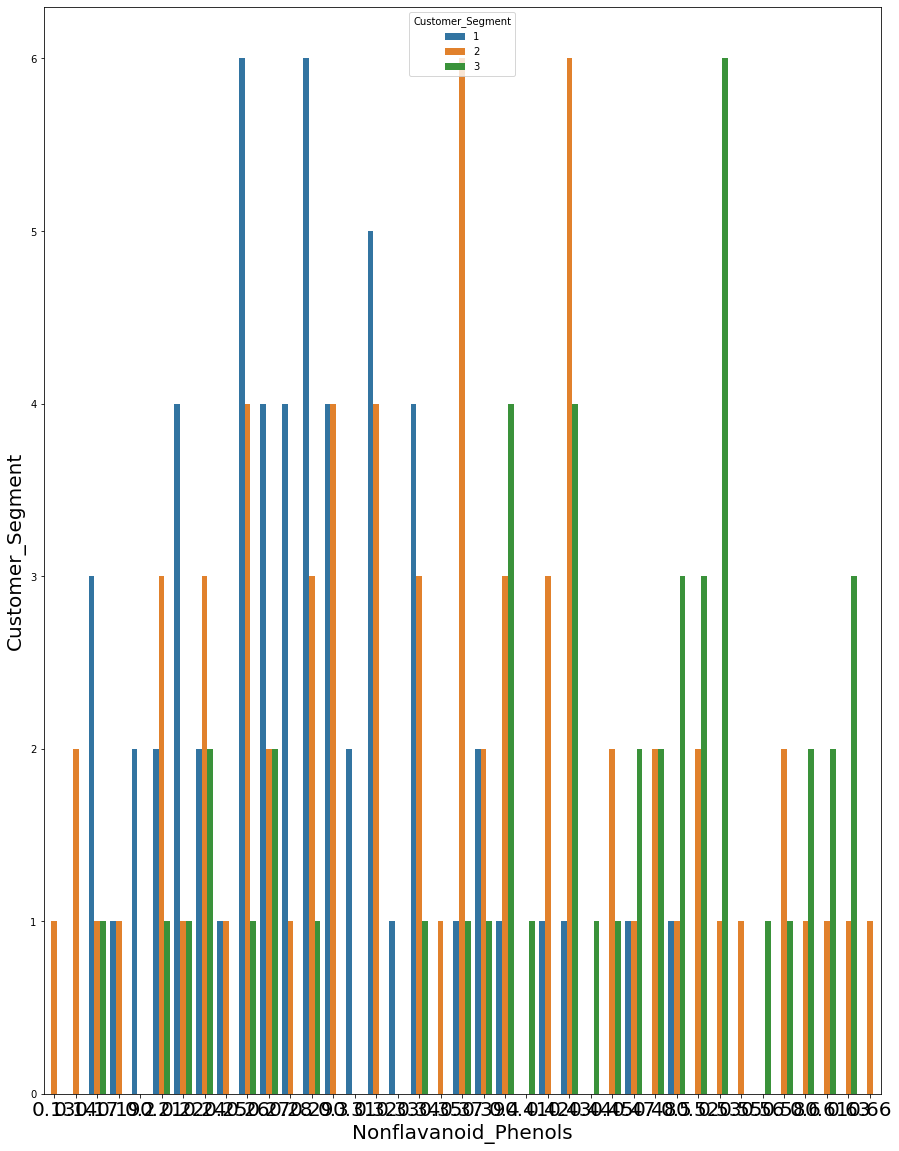

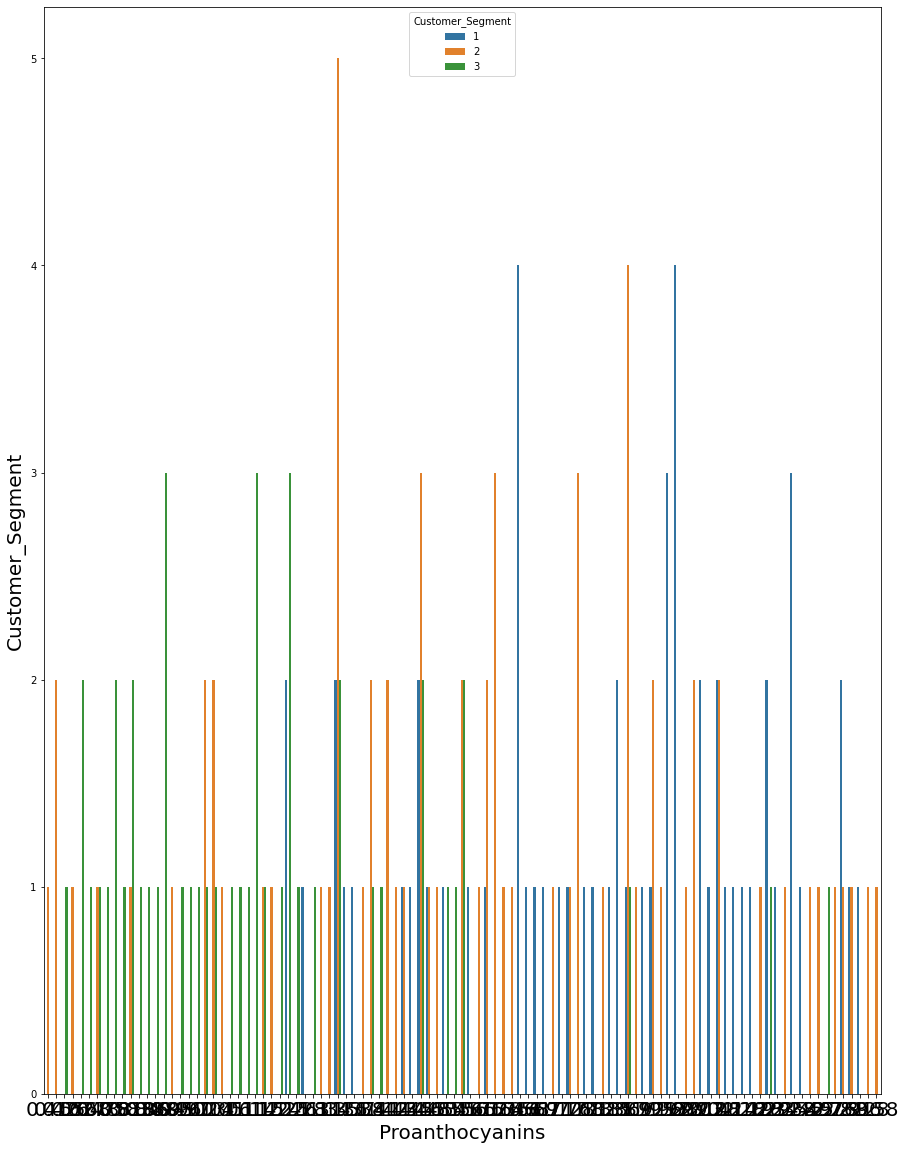

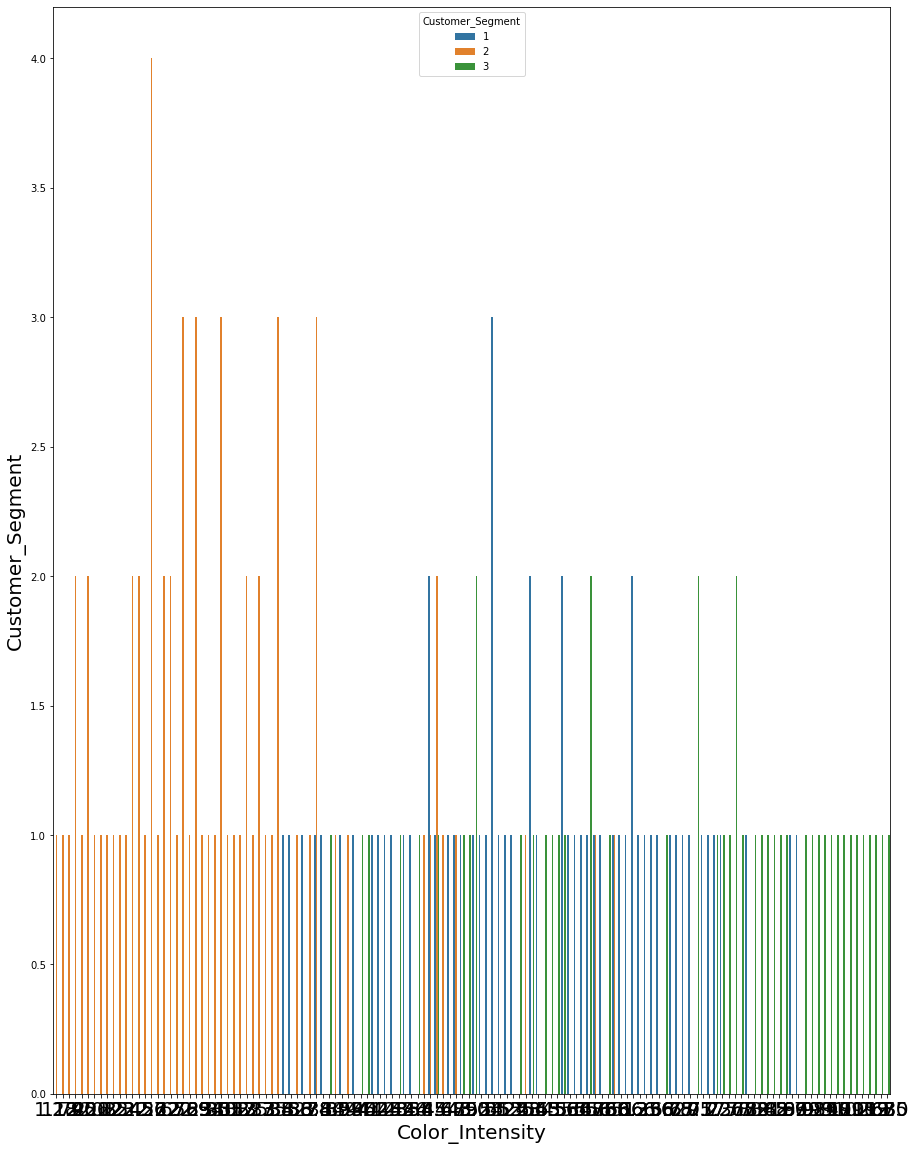

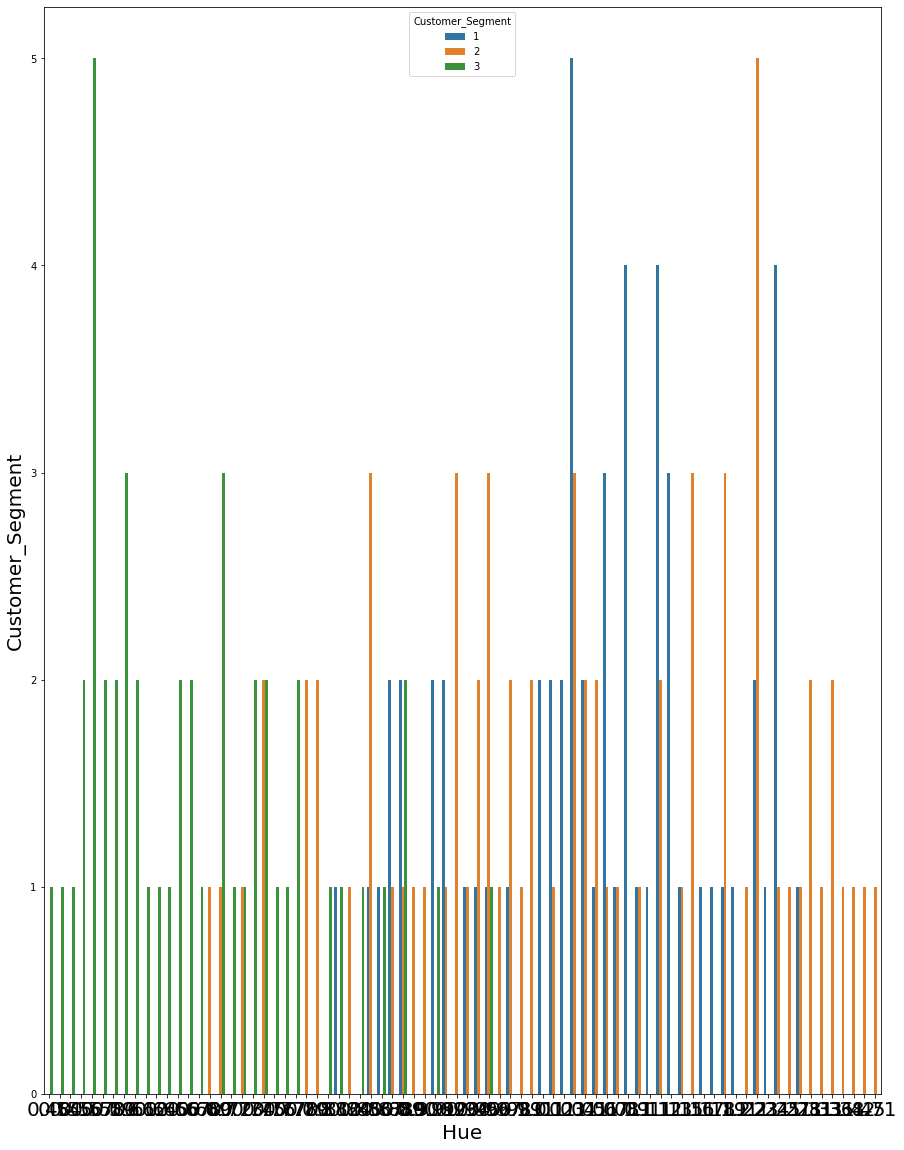

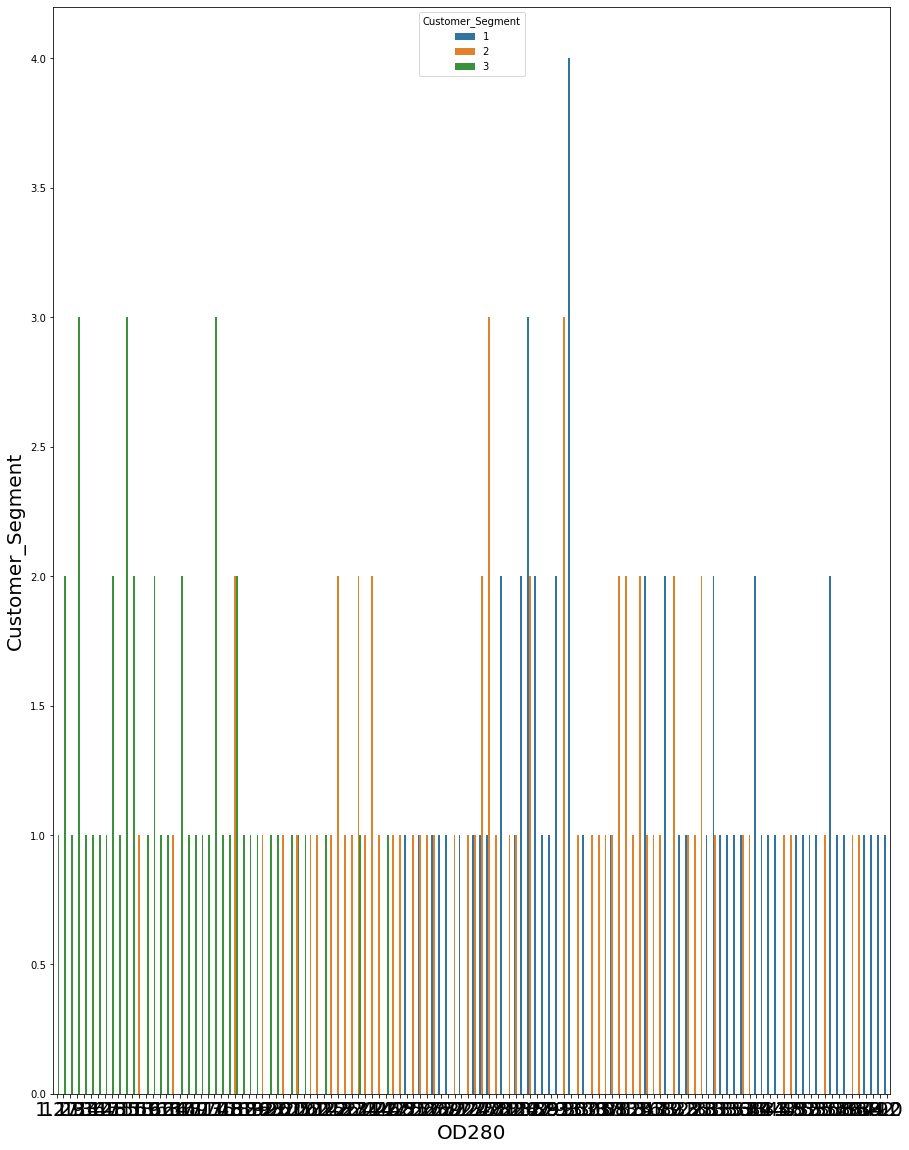

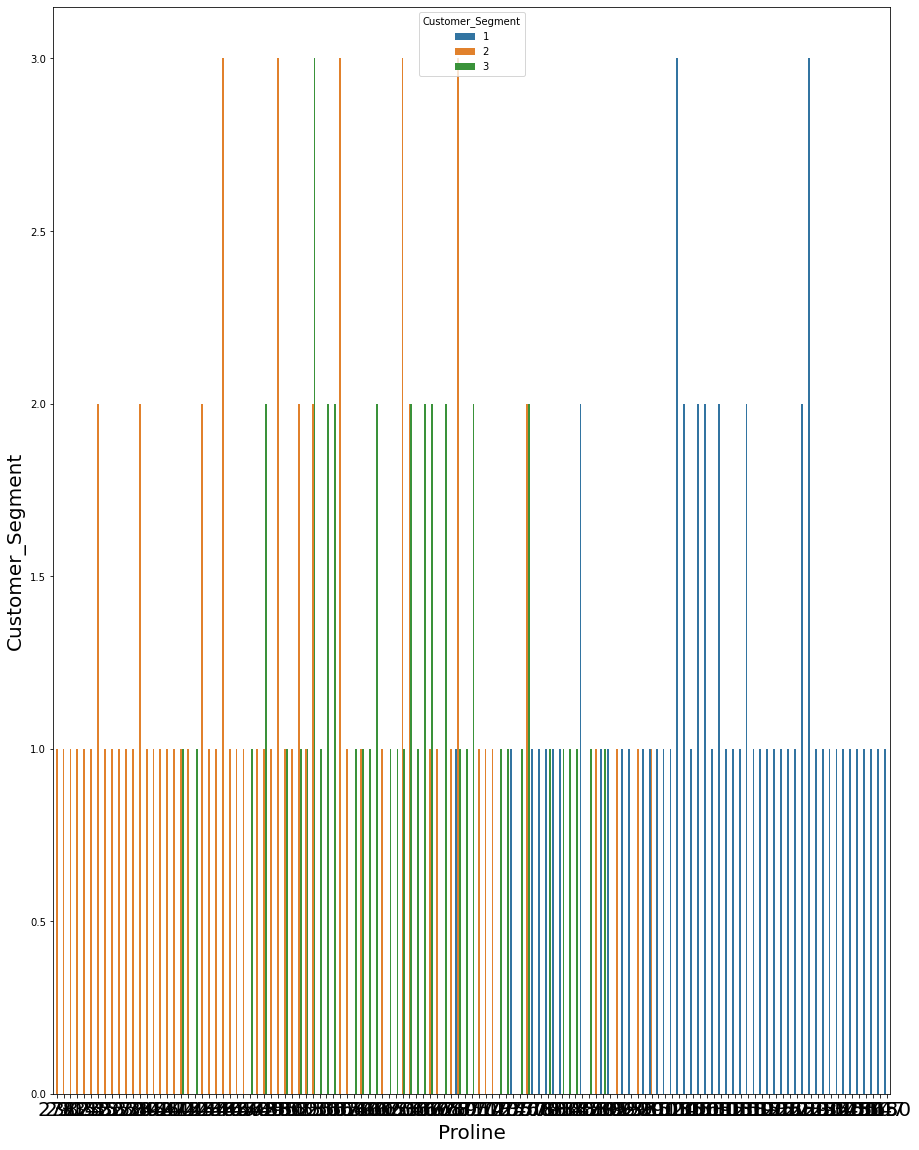

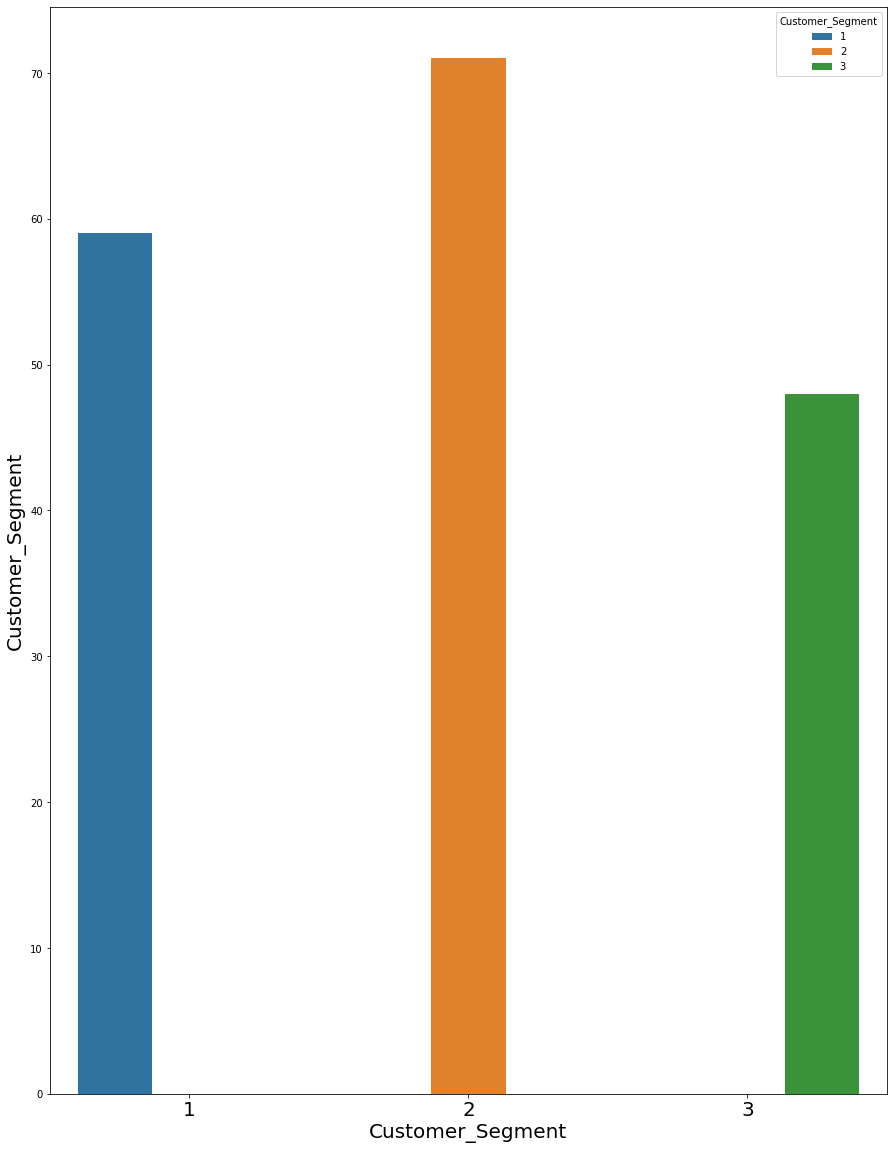

In [14]:
def relation_plot(col):
    plt.figure(figsize=(15,20))
    plots = sns.countplot(x=col, hue="Customer_Segment", data=dataset)
    plt.xlabel(col,fontsize= 20)
    plt.ylabel("Customer_Segment", fontsize= 20)
    plt.xticks(fontsize=20)
    
for i in list(dataset.columns):
    relation_plot(i)

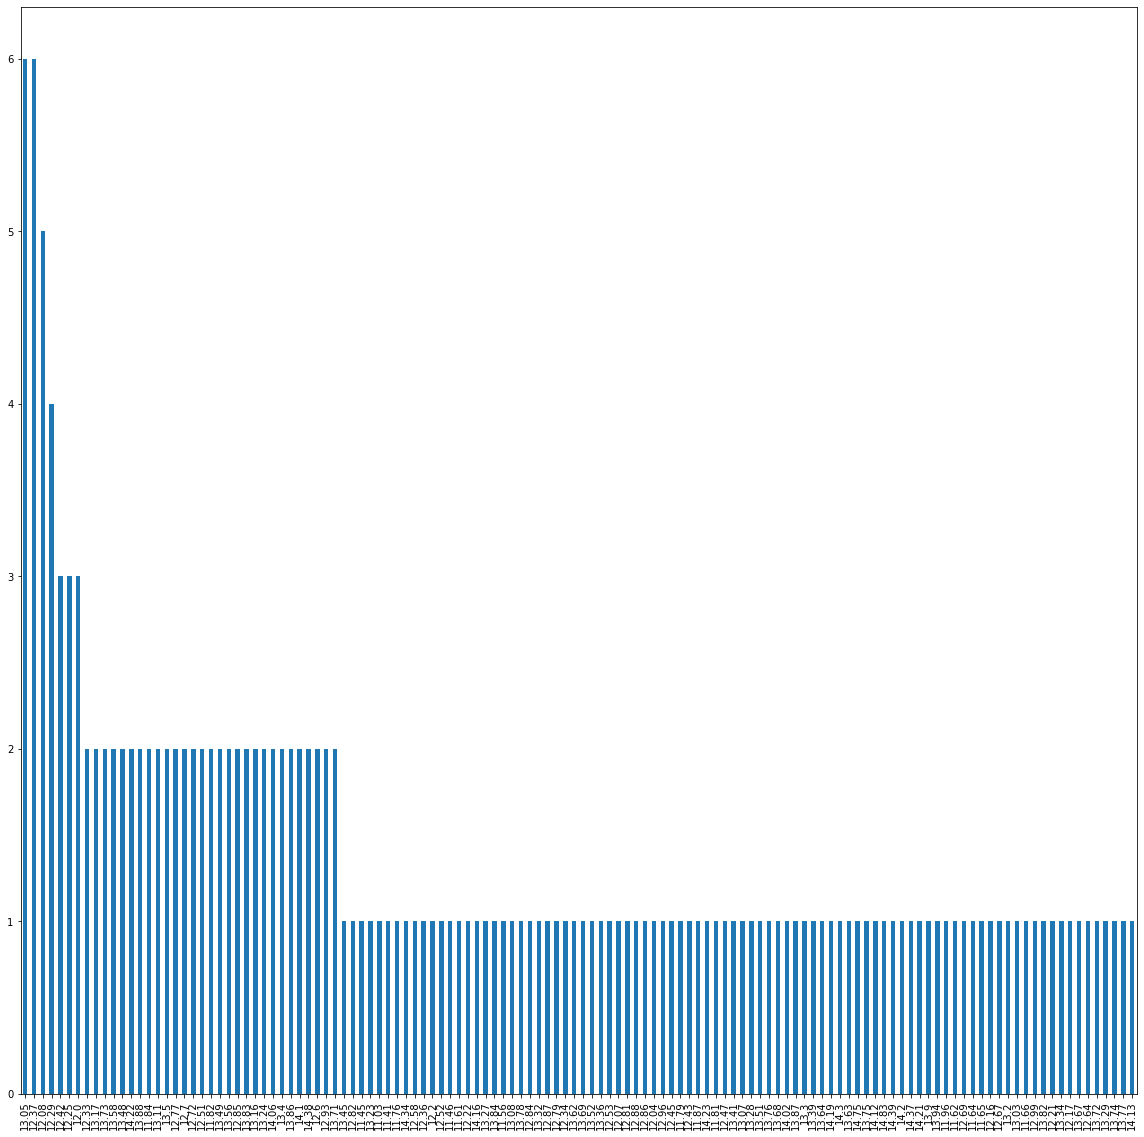

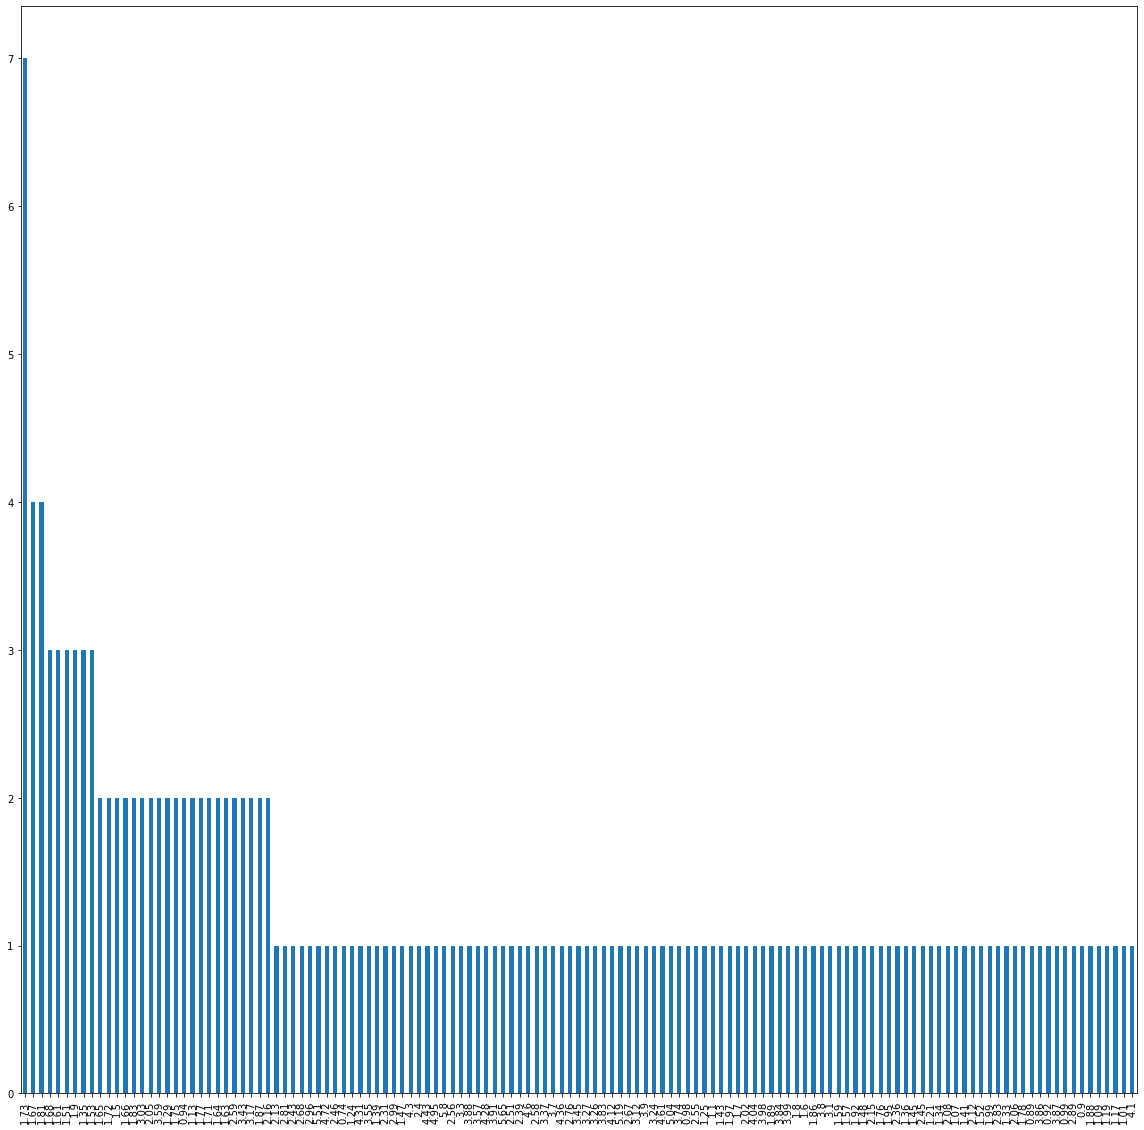

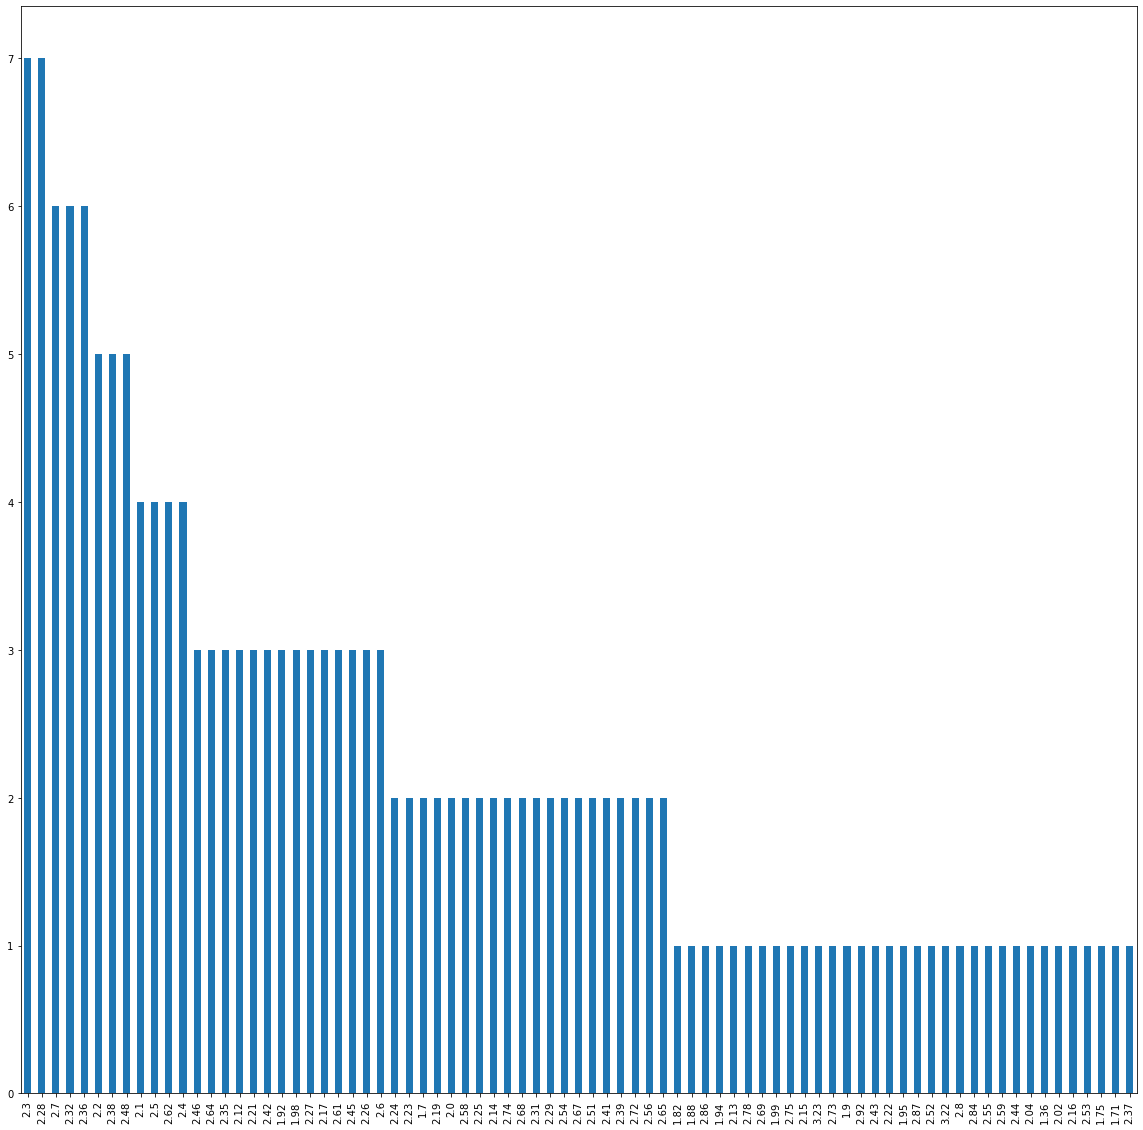

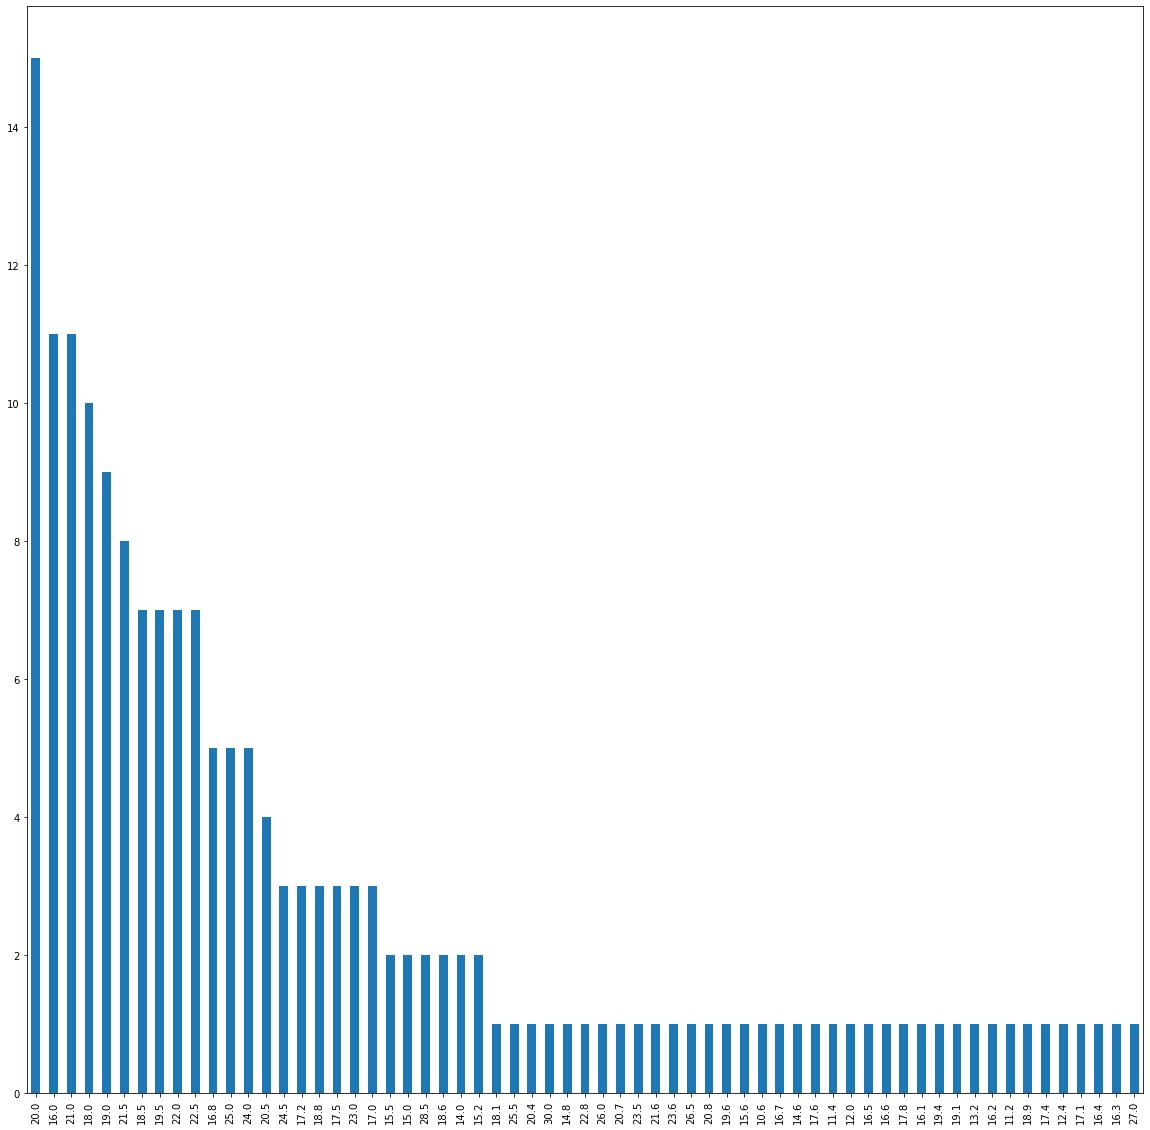

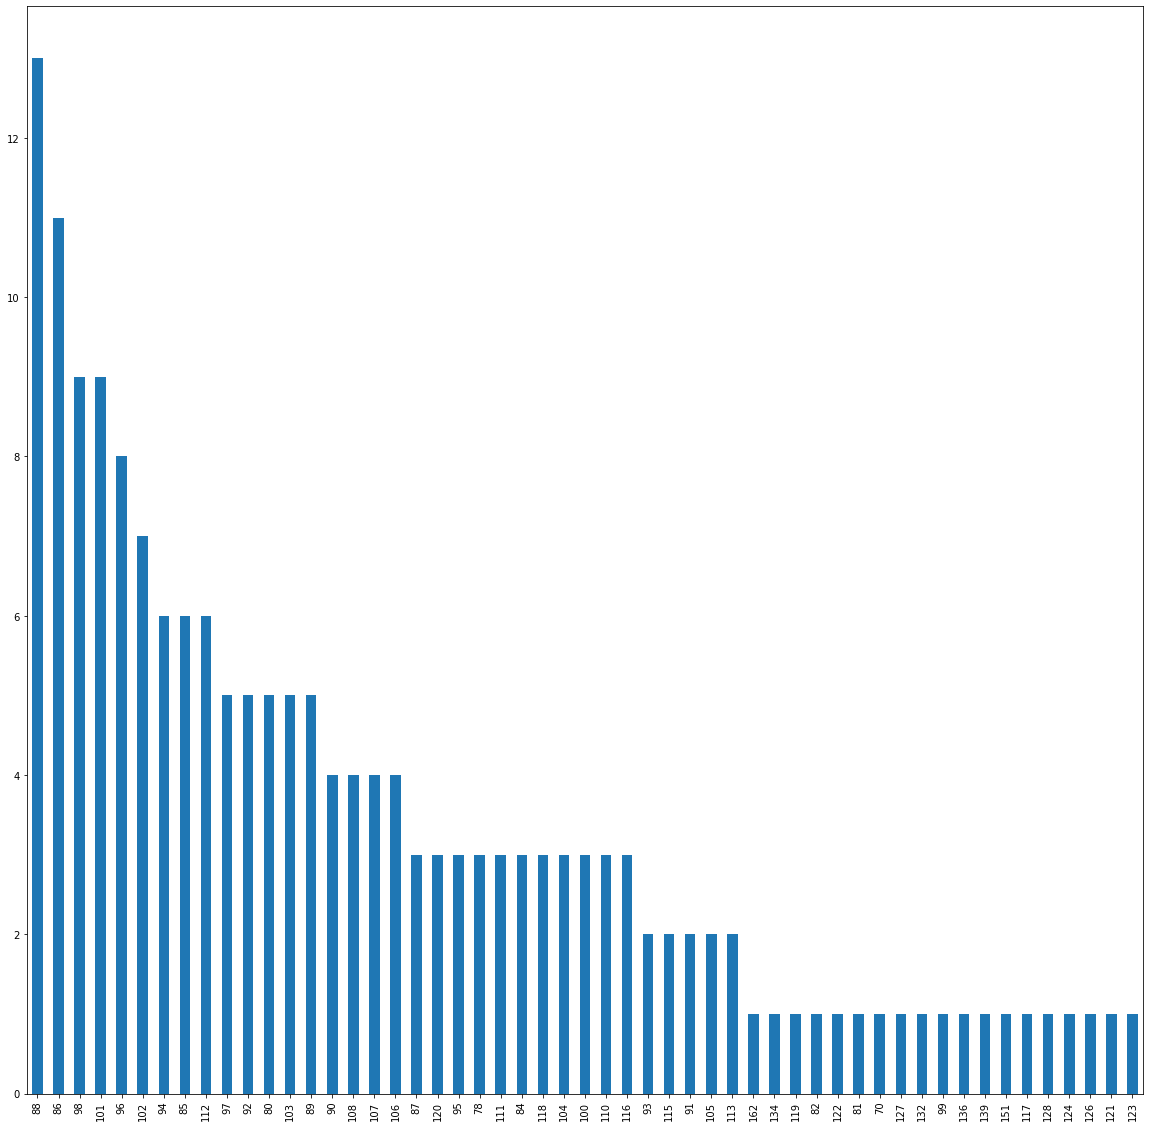

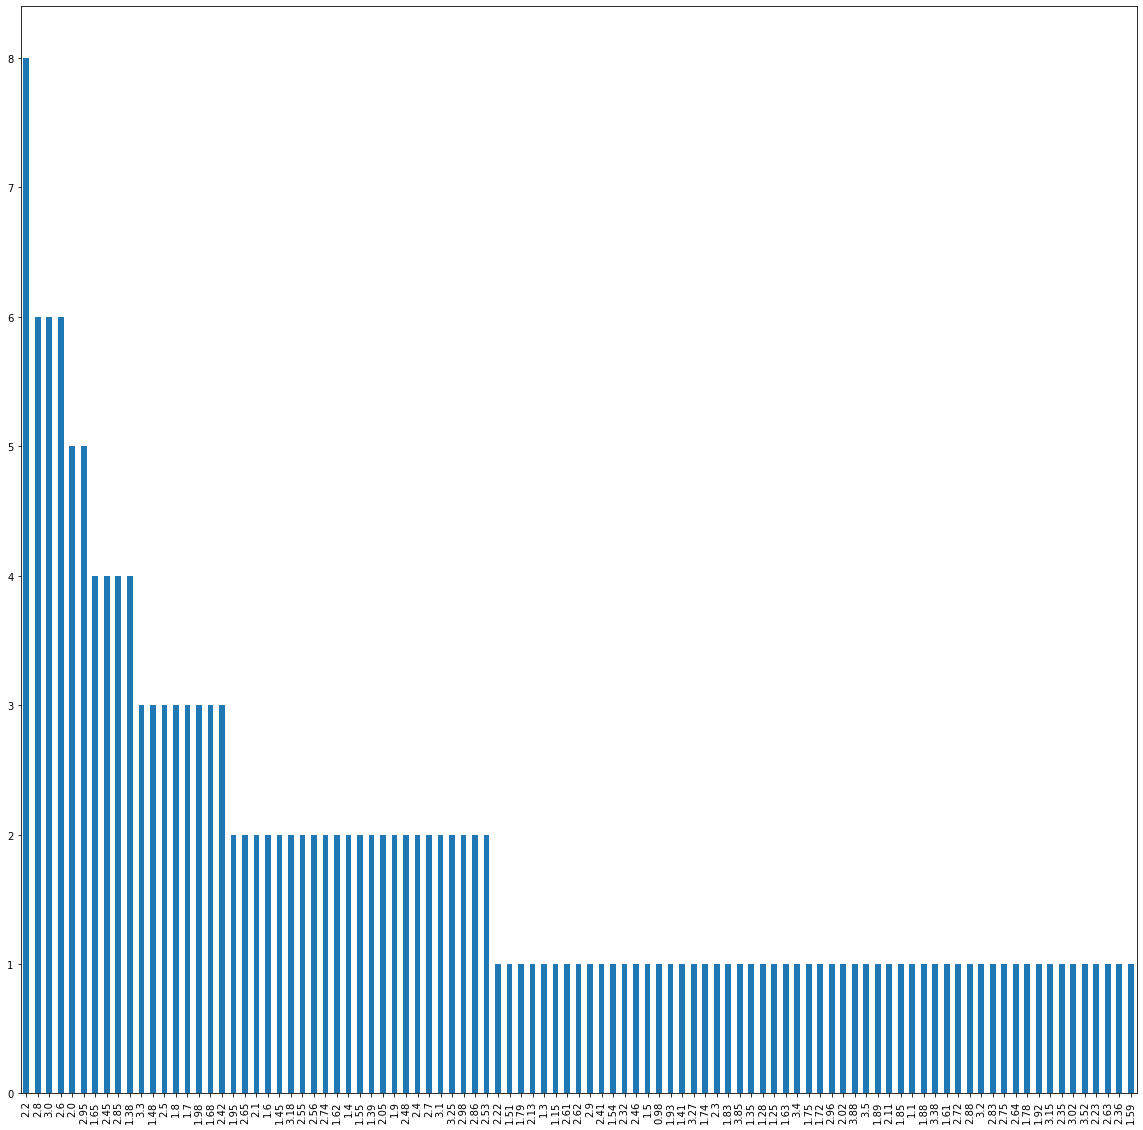

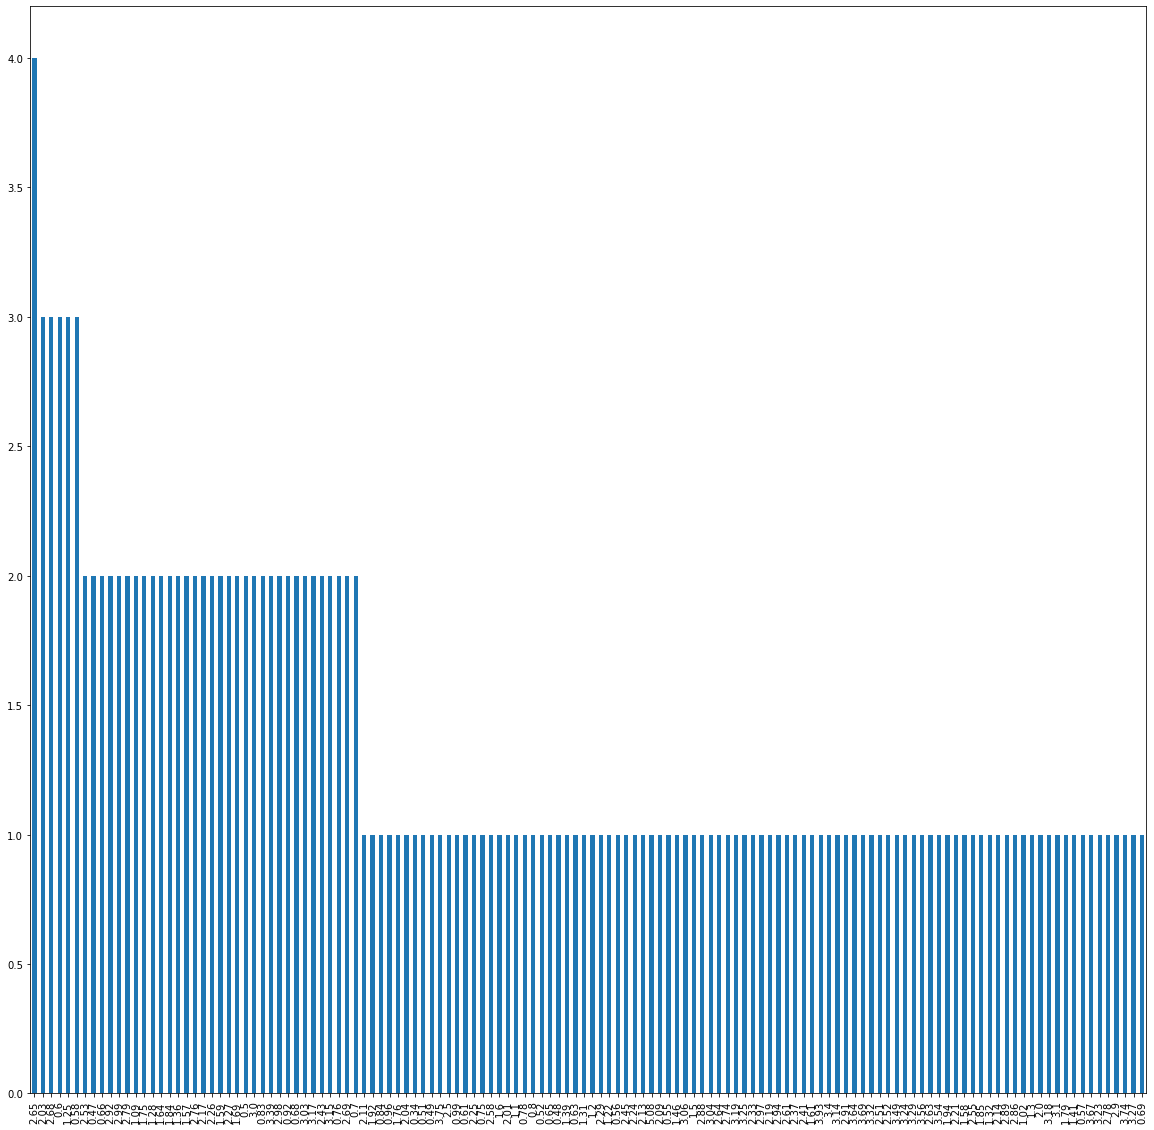

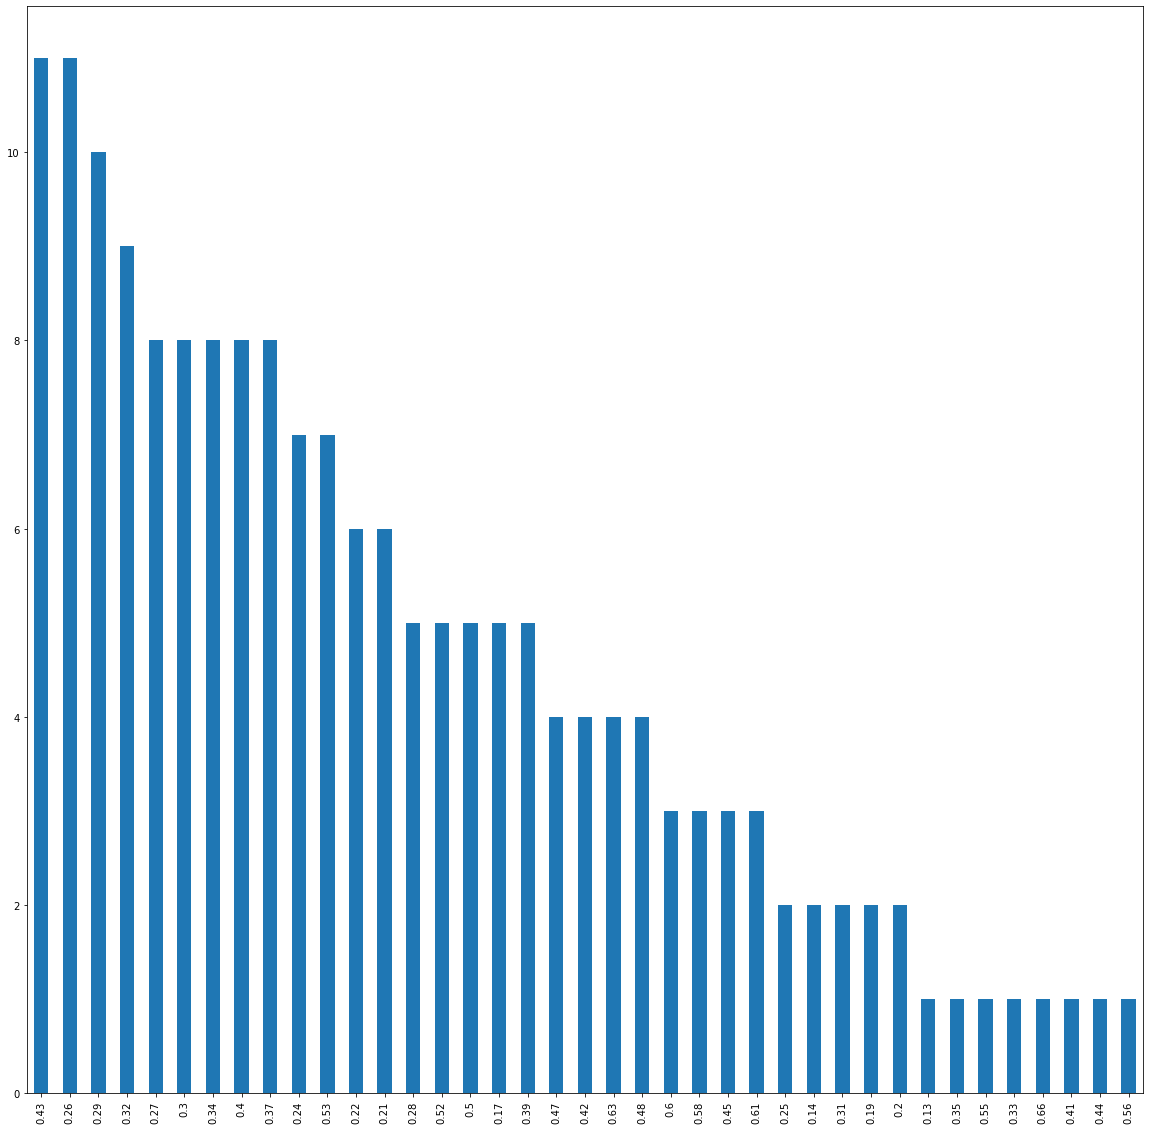

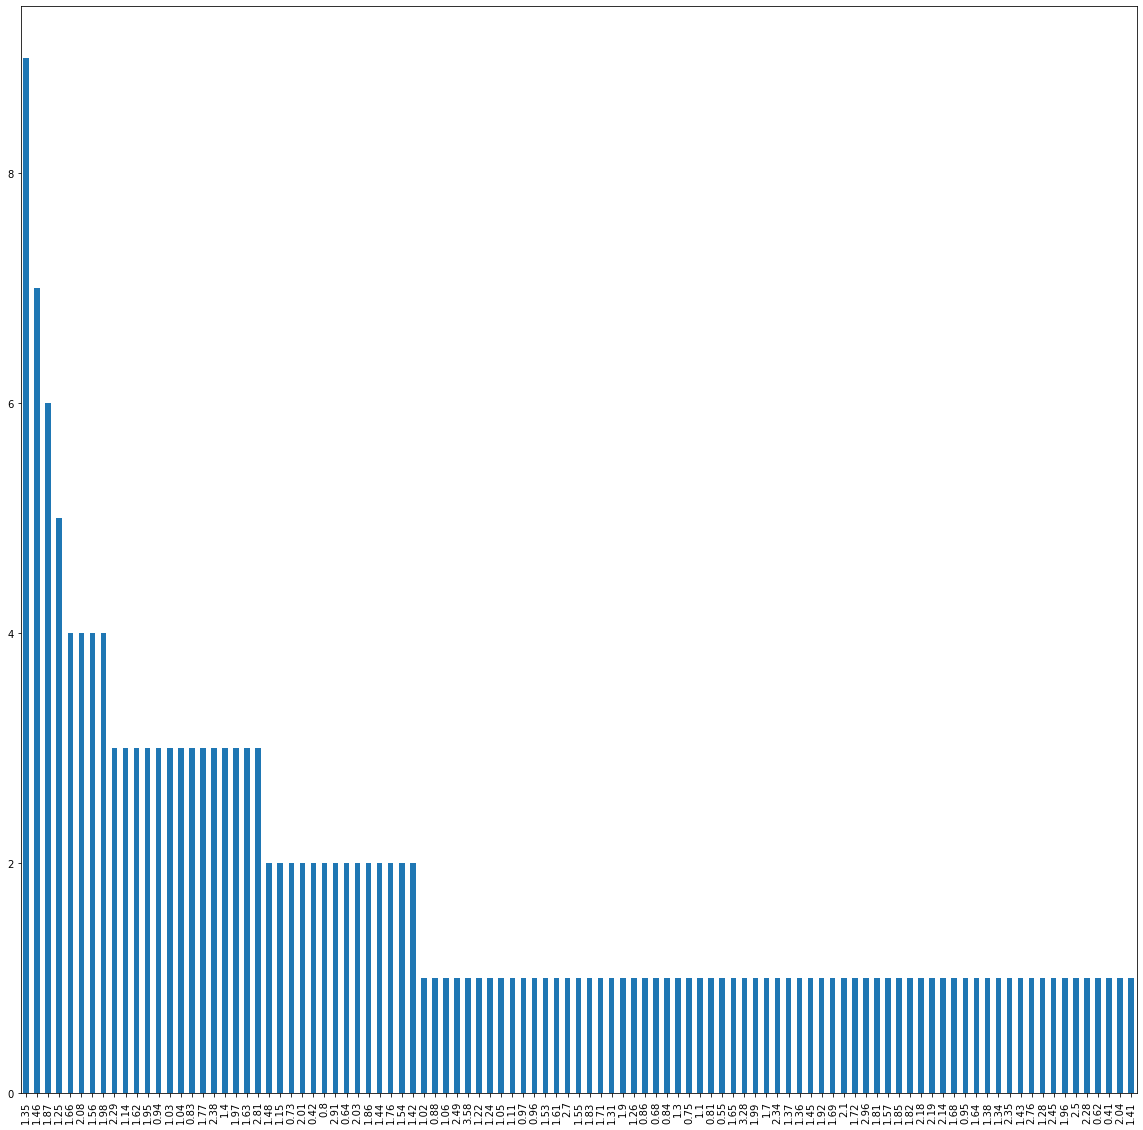

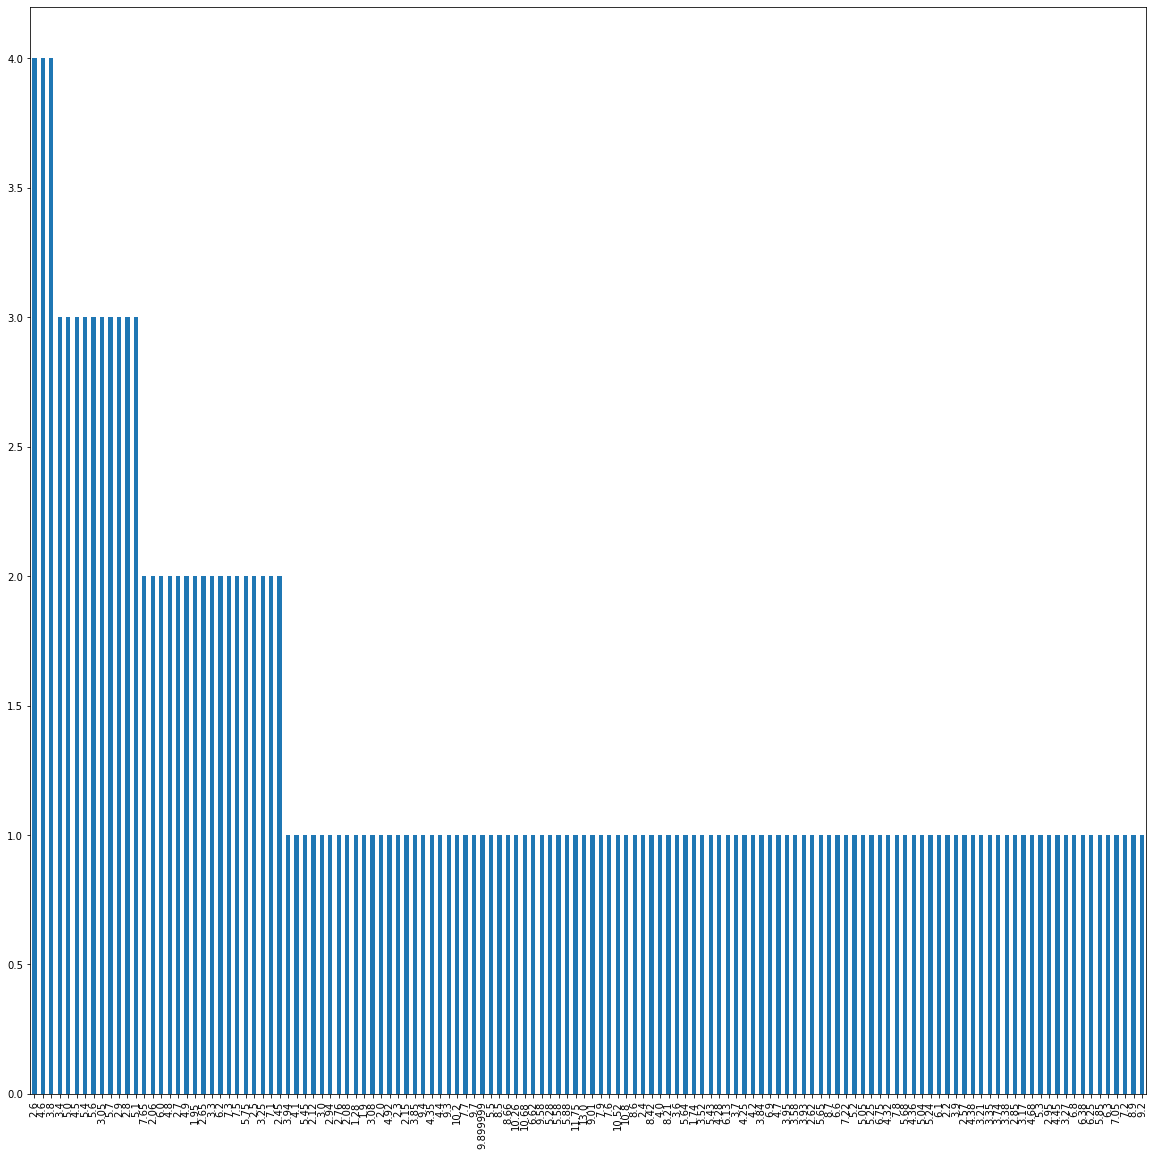

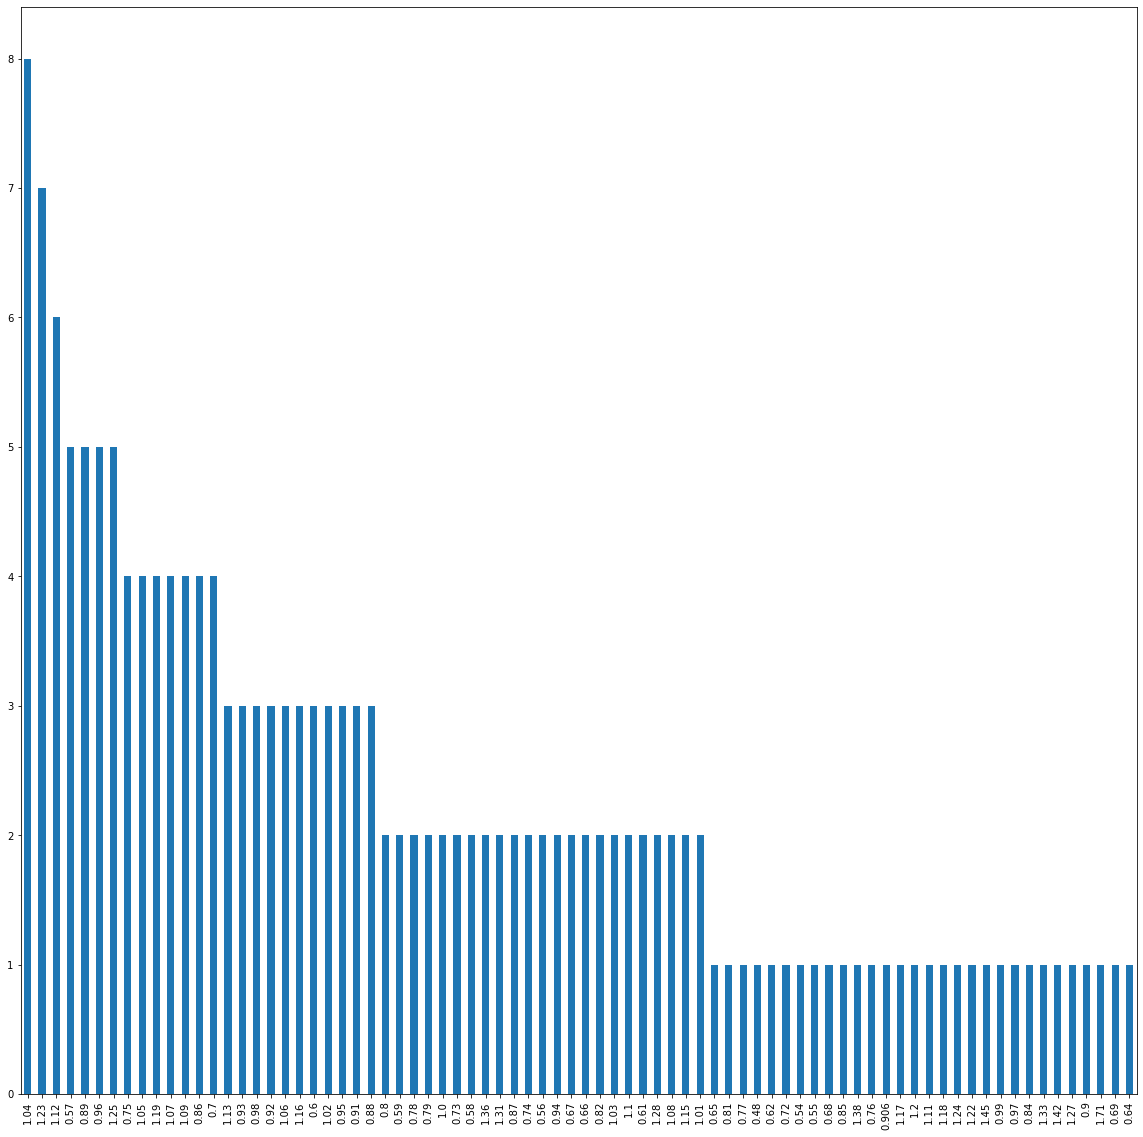

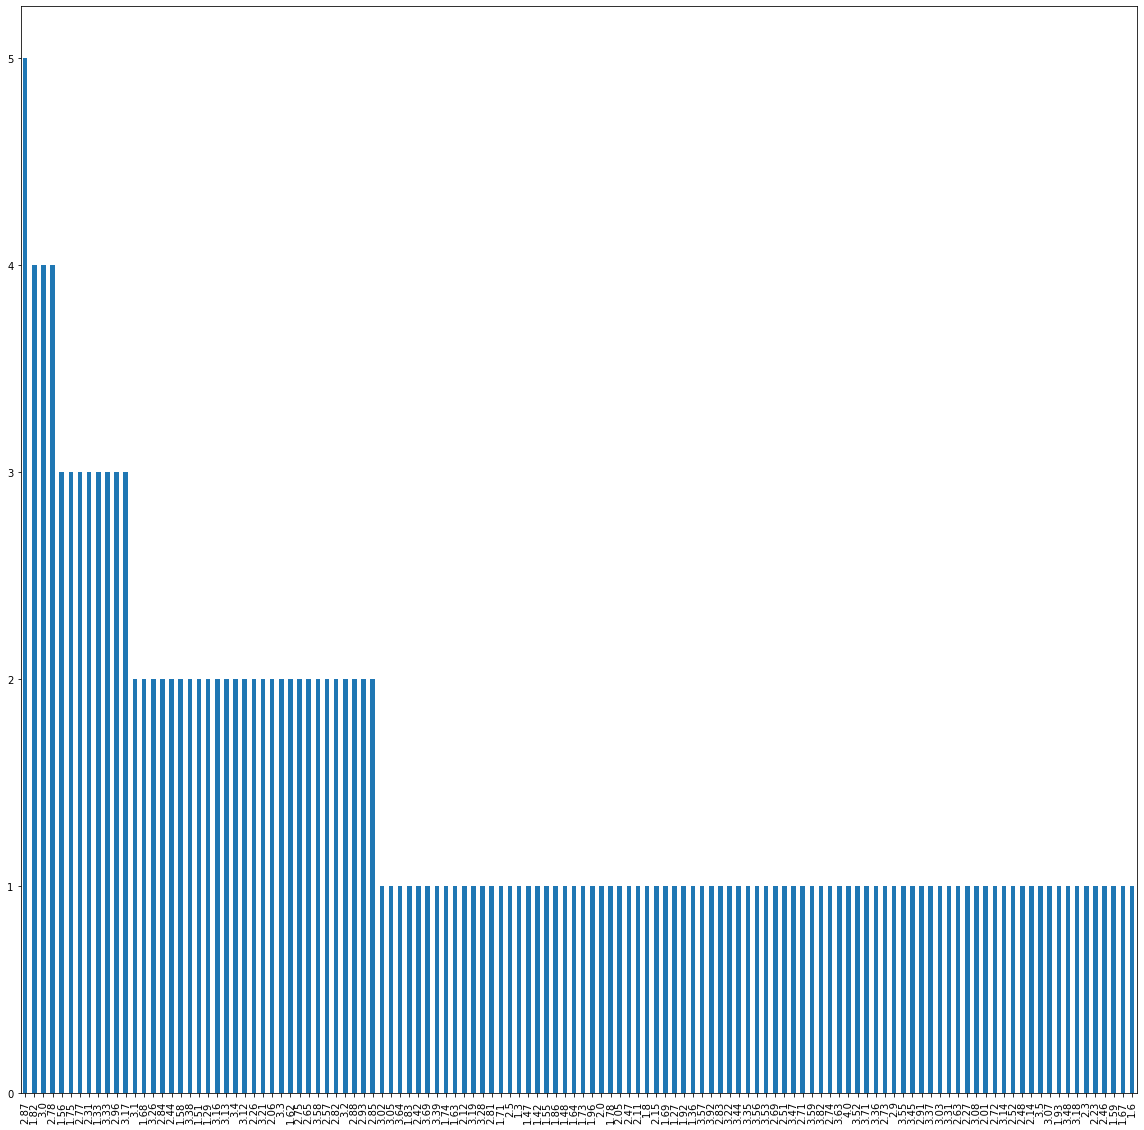

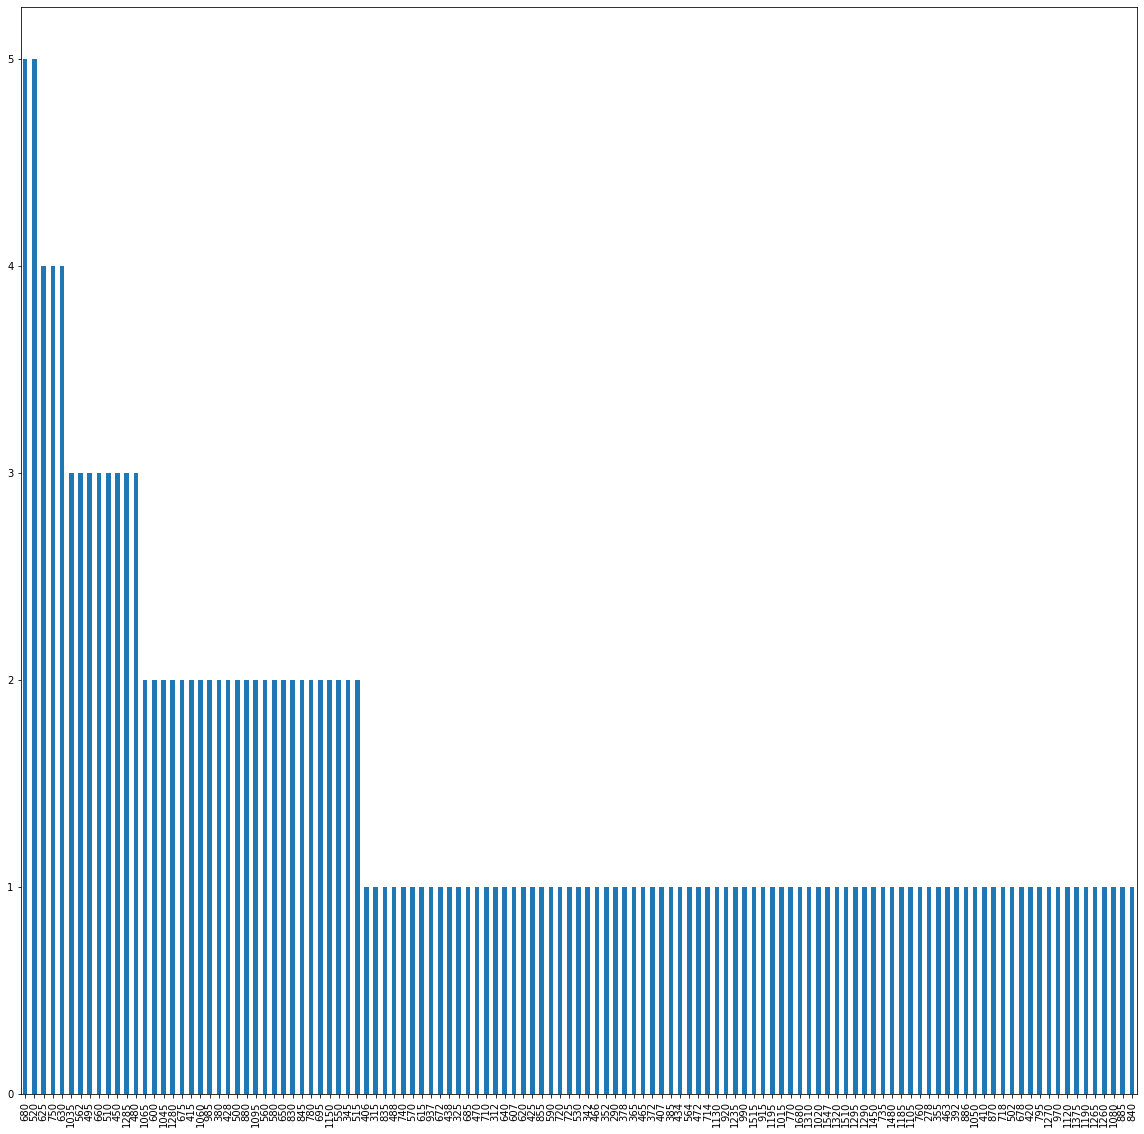

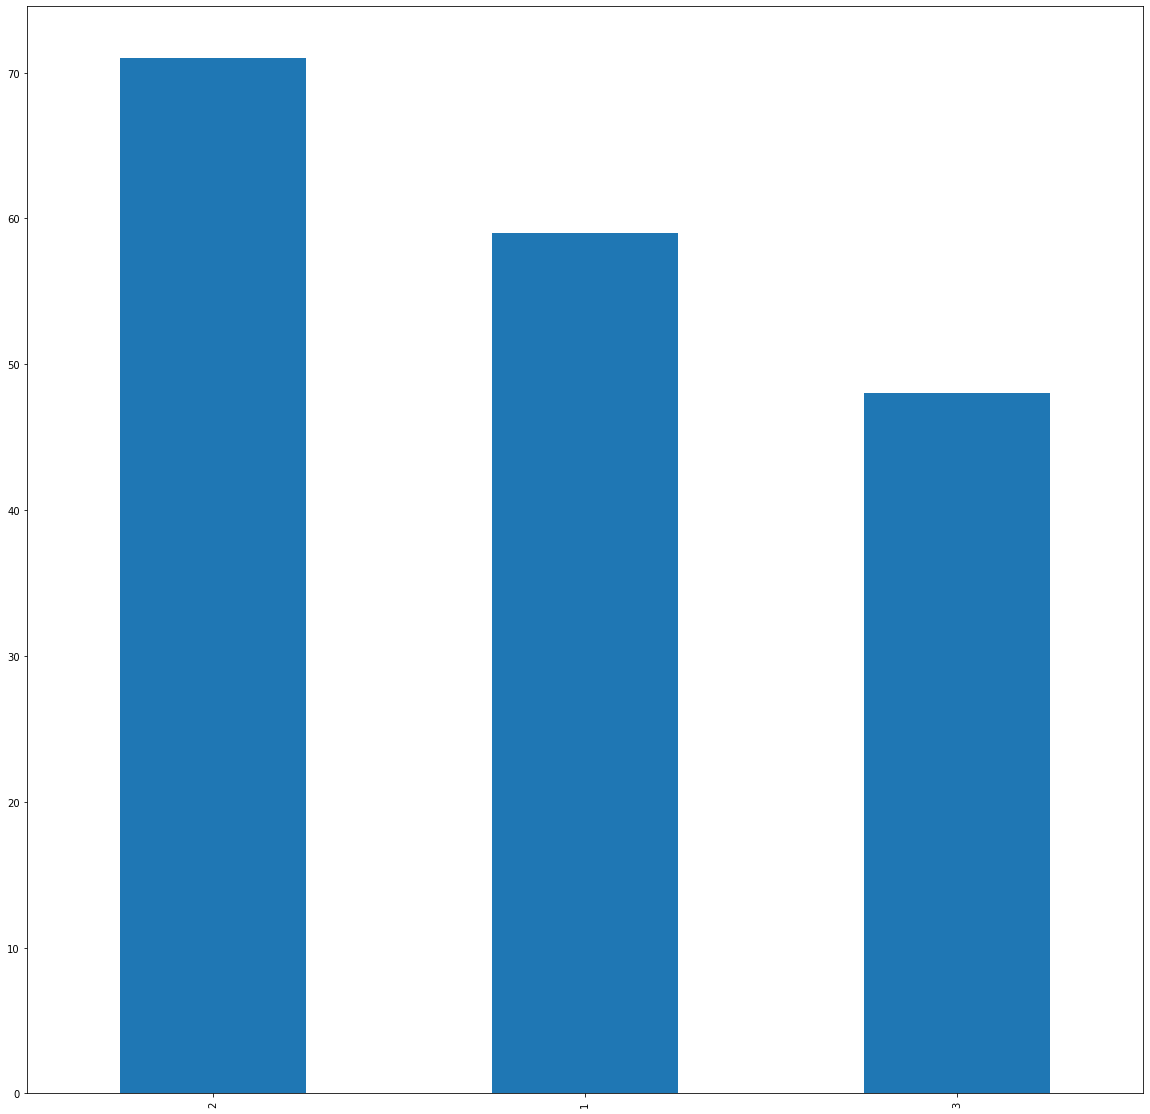

In [15]:
def value_counts(col):
    plt.figure(figsize=(20,20))
    dataset[col].value_counts().plot(kind='bar')
    plt.show()
    
for i in dataset.columns:
    value_counts(i)

In [16]:
# Check balanced dataset
dataset['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [17]:
x = dataset.drop('Customer_Segment',axis=1)
y = dataset['Customer_Segment']

In [18]:
x.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64

In [20]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print(Counter(y))
ros=RandomOverSampler()
x_ros,y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({2: 71, 1: 59, 3: 48})
Counter({1: 71, 2: 71, 3: 71})


In [21]:
# Feature scaling
# MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [22]:
# That is it for the data preprocessing

# 2. What are the optimum number of principal components in PCA?

In [23]:
# split the data into training and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 13)
(43, 13)
(170,)
(43,)


In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=None) # None - all variables
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_test)

In [26]:
x_train_n.shape

(170, 13)

In [27]:
x_test_n.shape

(43, 13)

In [28]:
pd.DataFrame(x_train_n)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.902882,-0.067782,-0.621830,0.634502,0.599805,-0.179076,0.184875,0.177853,-0.043723,-0.326571,0.028837,-0.025536,-0.043087
1,0.173346,1.056178,0.193599,0.222192,-0.174459,0.253437,-0.279703,-0.210393,-0.149527,-0.178645,0.028091,0.097144,0.123852
2,-1.453607,-0.289267,-0.324553,-0.366254,-0.044038,0.378942,-0.325584,-0.275317,-0.239696,0.040962,-0.224854,-0.013049,0.030624
3,1.032409,0.601801,-0.533323,-0.008215,-0.523316,0.689891,-0.277231,0.233628,0.111482,-0.097738,-0.257287,0.132624,0.021235
4,-1.018585,-0.864710,0.207785,0.014136,0.305247,0.157188,0.134470,0.104480,0.077189,0.180004,-0.399974,0.098150,-0.069960
5,1.796757,-0.919126,-0.129691,-0.248442,-0.477801,0.100531,0.409815,0.248930,-0.037138,0.058488,-0.032024,-0.170070,-0.084982
6,0.652390,-0.018849,-0.504989,-0.173680,-0.080379,-0.374631,0.092442,0.030759,-0.352464,0.021735,0.268338,0.151125,0.031350
7,1.159195,-0.092908,0.164654,0.026923,-0.159384,0.378193,-0.065350,-0.295182,0.368469,0.016881,-0.030383,-0.012867,0.042013
8,0.658032,-0.505659,0.300919,0.568534,-0.236859,-0.584040,-0.220873,-0.231086,-0.002851,-0.098408,0.048961,0.200436,0.063824
9,-1.260233,-0.174108,0.214697,0.079770,-0.225718,0.349571,0.112191,-0.218392,-0.228515,-0.395934,-0.018752,0.104471,-0.165905


In [29]:
pd.DataFrame(x_test_n)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.424341,0.169178,-0.394418,-0.174544,0.123913,-0.301048,-0.186306,0.102470,-0.051217,0.032616,0.045812,0.137848,0.064869
1,-0.335464,-0.134508,-0.123857,0.409669,0.085858,0.124225,0.393897,-0.086918,0.244163,-0.051417,-0.256779,0.011946,0.032137
2,-0.812555,0.231102,0.434593,1.559967,-0.136282,-0.085744,-0.370655,0.001624,-0.088355,0.229560,0.171538,-0.037327,-0.032551
3,-1.102854,0.701479,-0.134529,-0.308469,0.278473,0.130518,-0.427523,0.076650,-0.105330,-0.016104,-0.089746,-0.110120,-0.034431
4,-1.115336,-0.195228,0.055701,-0.221407,-0.101129,-0.238696,0.792170,0.005105,0.031547,0.273022,0.068479,0.016292,0.031928
5,-0.934960,1.364775,-0.318136,-0.130901,-0.150654,-0.326006,-0.101706,0.159545,-0.078964,-0.007034,0.067905,0.147668,-0.024031
6,-0.657691,-0.472298,-0.087461,-0.109649,0.190094,-0.462909,0.292870,-0.080965,-0.006405,-0.102401,-0.024493,0.079255,-0.010537
7,-0.523595,0.849850,-0.015077,-0.056387,0.772734,0.187581,-0.075986,-0.003145,0.312577,-0.186742,0.147191,0.134085,-0.042144
8,-0.872447,0.938364,-0.166465,0.326254,-0.287459,0.323237,0.052687,-0.283939,0.186020,-0.195124,-0.071696,-0.035653,0.060919
9,-0.128606,-0.766923,-0.220350,-0.176681,0.059139,0.482690,-0.065846,0.107042,0.416104,-0.042479,0.143781,0.105352,0.087533


In [30]:
# How many split happend after applying PCA
# Which all significant variable after applying pca, we have to take ?
explained_variance = pca.explained_variance_ratio_

In [31]:
explained_variance # this is the crux of PCA 

array([0.4406901 , 0.18592661, 0.08486779, 0.07765087, 0.05582554,
       0.03919653, 0.03670188, 0.02425647, 0.01970013, 0.0133053 ,
       0.00997747, 0.00780192, 0.00409939])

In [32]:
# 1st slice = 41.2%
# 2nd slice = 20.8 %
# 3rd slice = 0.08% 
# 4th slice = 0.07%
# 5th slice = 0.056%
# 6th slice = 0.04%
# 7th slice = 0.038%
# 8th slice = 0.029%
# 9th slice = 0.019%
# 10th slice = 0.01%

In [33]:
# Dimension Reduction - Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [34]:
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

# we have 95% variance of the component parameter
# 8 columns we need to have 95% variance

(213, 13)
(213, 10)


In [35]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=7)

# 4. Build a SVM Classifier and tune the hyperparameters to get the optimum model.

# SVM

In [36]:
# Support vector machine
from sklearn.svm import SVC

In [37]:
# Kernel = Linear
model1 = SVC(kernel='linear')
model1.fit(x_train, y_train)
y_pred_lr_train = model1.predict(x_train)
y_pred_lr = model1.predict(x_test)

# Kernel = sigmoid
model2 = SVC(kernel='sigmoid')
model2.fit(x_train, y_train)
y_pred_sg_train = model2.predict(x_train)
y_pred_sg = model2.predict(x_test)

# Kernel = poly
model3 = SVC(kernel='poly')
model3.fit(x_train, y_train)
y_pred_pl_train = model3.predict(x_train)
y_pred_pl = model3.predict(x_test)

# Kernel = rbf
model4 = SVC(kernel='rbf')
model4.fit(x_train, y_train)
y_pred_rbf_train = model4.predict(x_train)
y_pred_rbf = model4.predict(x_test)


In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
print("Linear model - Support vector machine")
print(confusion_matrix(y_train,y_pred_lr_train))
print("**************"*5)
print(confusion_matrix(y_test,y_pred_lr))

print("sigmoid model - Support vector machine")
print(confusion_matrix(y_train,y_pred_sg_train))
print("**************"*5)
print(confusion_matrix(y_test,y_pred_sg))

print("poly model - Support vector machine")
print(confusion_matrix(y_train,y_pred_pl_train))
print("**************"*5)
print(confusion_matrix(y_test,y_pred_pl))

print("rbf model - Support vector machine")
print(confusion_matrix(y_train,y_pred_rbf_train))
print("**************"*5)
print(confusion_matrix(y_test,y_pred_rbf))


Linear model - Support vector machine
[[63  0  0]
 [ 1 46  1]
 [ 0  0 59]]
**********************************************************************
[[ 8  0  0]
 [ 1 22  0]
 [ 0  0 12]]
sigmoid model - Support vector machine
[[63  0  0]
 [ 2 45  1]
 [ 0  0 59]]
**********************************************************************
[[ 8  0  0]
 [ 1 22  0]
 [ 0  0 12]]
poly model - Support vector machine
[[63  0  0]
 [ 0 48  0]
 [ 0  0 59]]
**********************************************************************
[[ 8  0  0]
 [ 0 23  0]
 [ 0  0 12]]
rbf model - Support vector machine
[[63  0  0]
 [ 0 47  1]
 [ 0  0 59]]
**********************************************************************
[[ 8  0  0]
 [ 0 23  0]
 [ 0  0 12]]


In [40]:
print("Linear model - Support vector machine")
print(classification_report(y_train,y_pred_lr_train))
print("**************"*5)
print(classification_report(y_test,y_pred_lr))

print("sigmoid model - Support vector machine")
print(classification_report(y_train,y_pred_sg_train))
print("**************"*5)
print(classification_report(y_test,y_pred_sg))

print("poly model - Support vector machine")
print(classification_report(y_train,y_pred_pl_train))
print("**************"*5)
print(classification_report(y_test,y_pred_pl))

print("rbf model - Support vector machine")
print(classification_report(y_train,y_pred_rbf_train))
print("**************"*5)
print(classification_report(y_test,y_pred_rbf))

Linear model - Support vector machine
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        63
           2       1.00      0.96      0.98        48
           3       0.98      1.00      0.99        59

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170

**********************************************************************
              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00        12

    accuracy                           0.98        43
   macro avg       0.96      0.99      0.97        43
weighted avg       0.98      0.98      0.98        43

sigmoid model - Support vector machine
              precision    recall  f1-score   support

           1       0.97      1.00  

In [41]:
print("Linear model - Support vector machine")
print(accuracy_score(y_train,y_pred_lr_train))
print("**************"*5)
print(accuracy_score(y_test,y_pred_lr))
print()
print()

print("sigmoid model - Support vector machine")
print(accuracy_score(y_train,y_pred_sg_train))
print("**************"*5)
print(accuracy_score(y_test,y_pred_sg))
print()
print()

print("poly model - Support vector machine")
print(accuracy_score(y_train,y_pred_pl_train))
print("**************"*5)
print(accuracy_score(y_test,y_pred_pl))
print()
print()

print("rbf model - Support vector machine")
print(accuracy_score(y_train,y_pred_rbf_train))
print("**************"*5)
print(accuracy_score(y_test,y_pred_rbf))
print()
print()

Linear model - Support vector machine
0.9882352941176471
**********************************************************************
0.9767441860465116
sigmoid model - Support vector machine
0.9823529411764705
**********************************************************************
0.9767441860465116
poly model - Support vector machine
1.0
**********************************************************************
1.0
rbf model - Support vector machine
0.9941176470588236
**********************************************************************
1.0


In [42]:
# Hyperparameter tuning

In [43]:
# Create a regularisation RIDGE Model and note the coefficient
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [44]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train, y_train)
print("Ridge Model Coefficent Values :", (ridge.coef_))

Ridge Model Coefficent Values : [ 0.76960921  0.01231272 -0.16972904  0.15760615  0.2497972   0.36981999
 -0.20242415  0.03882444  0.10770793 -0.02474839]


In [45]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model with Coefficient Values :", (lasso.coef_))

Lasso Model with Coefficient Values : [ 0.67820068  0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.        ]


In [46]:
print("Ridge training accuracy :",ridge.score(x_train, y_train))
print("Ridge test accuracy :", ridge.score(x_test, y_test))

print("#############"*10)

print("Lasso training accuracy :",lasso.score(x_train, y_train))
print("Lasso test accuracy :", lasso.score(x_test, y_test))

Ridge training accuracy : 0.8916066493422024
Ridge test accuracy : 0.822657648042801
##################################################################################################################################
Lasso training accuracy : 0.8275299966895373
Lasso test accuracy : 0.7872961305361795


# 3. Build a KNN classifier considering optimal number of principal components and value of K and state its score.

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# Finding the error rate list and choosing the neighbour point

error_rate = []

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [49]:
error_rate

[0.046511627906976744,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.09302325581395349,
 0.06976744186046512,
 0.09302325581395349,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.09302325581395349,
 0.06976744186046512,
 0.046511627906976744,
 0.046511627906976744,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.09302325581395349,
 0.06976744186046512,
 0.09302325581395349,
 0.09302325581395349,
 0.09302325581395349,
 0.046511627906976744,
 0.06976744186046512,
 0.046511627906976744,
 0.046511627906976744,
 0.046511627906976744,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.06976744186046512,
 0.09302325581395349]

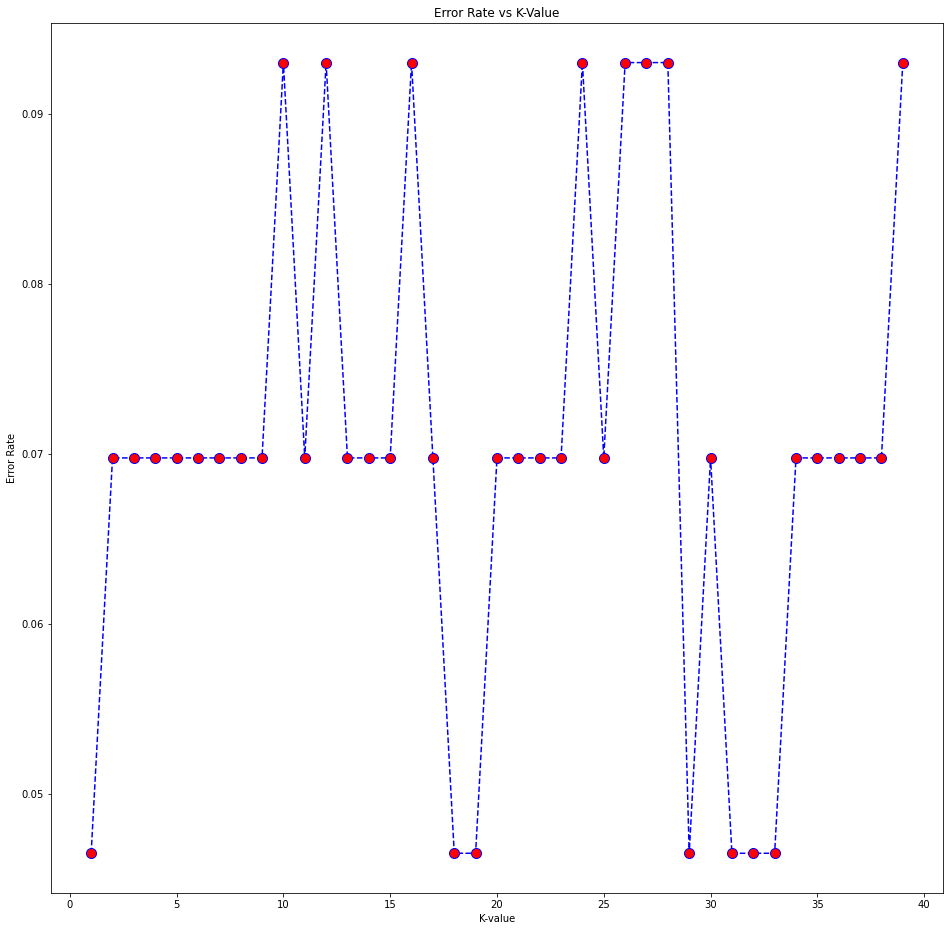

In [50]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor = 'red', markersize=10)
plt.title("Error Rate vs K-Value")
plt.xlabel("K-value")
plt.ylabel("Error Rate")
plt.show()

In [51]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [52]:
# Predict 
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [54]:
print(confusion_matrix(y_train, y_pred_knn_train))
print("#############"*9)
print(confusion_matrix(y_test, y_pred_knn_test))

[[63  0  0]
 [ 2 43  3]
 [ 0  0 59]]
#####################################################################################################################
[[ 8  0  0]
 [ 2 20  1]
 [ 0  0 12]]


In [55]:
print(classification_report(y_train, y_pred_knn_train))
print("#############"*9)
print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        63
           2       1.00      0.90      0.95        48
           3       0.95      1.00      0.98        59

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170

#####################################################################################################################
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         8
           2       1.00      0.87      0.93        23
           3       0.92      1.00      0.96        12

    accuracy                           0.93        43
   macro avg       0.91      0.96      0.93        43
weighted avg       0.94      0.93      0.93        43



In [56]:
print(accuracy_score(y_train, y_pred_knn_train))
print("#############"*9)
print(accuracy_score(y_test, y_pred_knn_test))

0.9705882352941176
#####################################################################################################################
0.9302325581395349


# 5. Build a Naive Bayes Classifier and comment about its accuracy

# Naive Bayes

## Gaussian Naive Bayes - Very good performance in multiclass classification problem, so it will will helpful for this dataset

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [58]:
y_pred_gnb_training = gnb.predict(x_train)
y_pred_gnb_test = gnb.predict(x_test)

In [59]:
print(confusion_matrix(y_train, y_pred_gnb_training))
print("###########"*5)
print(confusion_matrix(y_test, y_pred_gnb_test))

[[62  1  0]
 [ 1 45  2]
 [ 0  0 59]]
#######################################################
[[ 8  0  0]
 [ 0 23  0]
 [ 0  0 12]]


In [60]:
print(classification_report(y_train, y_pred_gnb_training))
print("###########"*5)
print(classification_report(y_test, y_pred_gnb_test))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        63
           2       0.98      0.94      0.96        48
           3       0.97      1.00      0.98        59

    accuracy                           0.98       170
   macro avg       0.98      0.97      0.97       170
weighted avg       0.98      0.98      0.98       170

#######################################################
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        12

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [61]:
print(accuracy_score(y_train, y_pred_gnb_training))
print("###########"*5)
print(accuracy_score(y_test, y_pred_gnb_test))

0.9764705882352941
#######################################################
1.0


## Bernoulli-Naive bayes - Will be helpful in binary class classification as 0/1 or true/false etc.
## So it will not be suitable for this dataset

In [63]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [64]:
y_pred_bnb_training = bnb.predict(x_train)
y_pred_bnb_test = bnb.predict(x_test)

In [65]:
print(confusion_matrix(y_train, y_pred_bnb_training))
print("###########"*5)
print(confusion_matrix(y_test, y_pred_bnb_test))

[[57  6  0]
 [ 0 47  1]
 [ 0 11 48]]
#######################################################
[[ 6  2  0]
 [ 0 22  1]
 [ 0  4  8]]


In [66]:
print(classification_report(y_train, y_pred_bnb_training))
print("###########"*5)
print(classification_report(y_test, y_pred_bnb_test))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        63
           2       0.73      0.98      0.84        48
           3       0.98      0.81      0.89        59

    accuracy                           0.89       170
   macro avg       0.90      0.90      0.89       170
weighted avg       0.92      0.89      0.90       170

#######################################################
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         8
           2       0.79      0.96      0.86        23
           3       0.89      0.67      0.76        12

    accuracy                           0.84        43
   macro avg       0.89      0.79      0.83        43
weighted avg       0.85      0.84      0.83        43



In [67]:
print(accuracy_score(y_train, y_pred_bnb_training))
print("###########"*5)
print(accuracy_score(y_test, y_pred_bnb_test))

0.8941176470588236
#######################################################
0.8372093023255814


# From the above result, we can conclude Gaussian is more optimal - Because for multi class classification - Gaussian dist is best

# 6. Compare all of the models and justify your choice about the optimum model.


In [68]:
#SVM
print("SVM")
print()
print("Linear model - Support vector machine")
print(accuracy_score(y_train,y_pred_lr_train))
print("**************"*5)
print(accuracy_score(y_test,y_pred_lr))
print()
print()

print("sigmoid model - Support vector machine")
print(accuracy_score(y_train,y_pred_sg_train))
print("**************"*5)
print(accuracy_score(y_test,y_pred_sg))
print()
print()

print("poly model - Support vector machine")
print(accuracy_score(y_train,y_pred_pl_train))
print("**************"*5)
print(accuracy_score(y_test,y_pred_pl))
print()
print()

print("rbf model - Support vector machine")
print(accuracy_score(y_train,y_pred_rbf_train))
print("**************"*5)
print(accuracy_score(y_test,y_pred_rbf))
print()
print()

# Naive Bayes
print("Naive Bayes")
print()
print("Binomial - Naive Bayes")
print(accuracy_score(y_train, y_pred_bnb_training))
print("###########"*5)
print(accuracy_score(y_test, y_pred_bnb_test))
print()
print()

print("Gaussian - Naive Bayes")
print(accuracy_score(y_train, y_pred_gnb_training))
print("###########"*5)
print(accuracy_score(y_test, y_pred_gnb_test))
print()
print()


# KNN 
print("KNN Algorithm")
print(accuracy_score(y_train, y_pred_knn_train))
print("#############"*9)
print(accuracy_score(y_test, y_pred_knn_test))

SVM

Linear model - Support vector machine
0.9882352941176471
**********************************************************************
0.9767441860465116


sigmoid model - Support vector machine
0.9823529411764705
**********************************************************************
0.9767441860465116


poly model - Support vector machine
1.0
**********************************************************************
1.0


rbf model - Support vector machine
0.9941176470588236
**********************************************************************
1.0


Naive Bayes

Binomial - Naive Bayes
0.8941176470588236
#######################################################
0.8372093023255814


Gaussian - Naive Bayes
0.9764705882352941
#######################################################
1.0


KNN Algorithm
0.9705882352941176
#####################################################################################################################
0.9302325581395349


In [69]:
# Conclusion
# Here, by comparing every model, we got Polynomial & radial base functio(RBF) model in SVM is very optimal

# poly model - Support vector machine
# 1.0
# **********************************************************************
# 1.0


# rbf model - Support vector machine
# 0.9941176470588236
# **********************************************************************
# 1.0

# Also no bias & no variance found.